<div align="center">
  <img src="../Group Logo/Ahjin%20Logo.png" 
       alt="Ajhin Logo" 
       style="width:250px; height:250px; border-radius:50%;">
</div>

## **AUTHORS**

1. Pauline Kariuki  
2. Norman Mwapea  
3. Angela Chesire  
4. Carlton Ogolla  
5. Emmanuel Chol 

In [1]:
from IPython.display import Markdown, display
import ipynbname, json, re

def auto_toc(levels=3):
    path = ipynbname.path()
    with open(path, "r", encoding="utf-8") as f:
        nb = json.load(f)

    headers = []
    pattern = r'^(#{1,' + str(levels) + r'})\s+(.+)'

    for cell in nb["cells"]:
        if cell["cell_type"] == "markdown":
            for line in cell["source"]:
                m = re.match(pattern, line)
                if m:
                    level = len(m.group(1))
                    text = m.group(2).strip()
                    anchor = re.sub(r'[^\w\- ]', '', text).lower().replace(' ', '-')
                    headers.append((level, text, anchor))

    toc = "# TABLE OF CONTENTS\n\n"
    for level, text, anchor in headers:
        indent = "   " * (level - 1)
        toc += f"{indent}- [{text}](#{anchor})\n"

    return toc  # return TOC instead of displaying it

# Generate TOC
toc = auto_toc(3)

# Display only the TOC
display(Markdown(toc))

# TABLE OF CONTENTS

   - [**AUTHORS**](#authors)
- [1. BUSINESS UNDERSTANDING <a id="business-understanding"></a>](#1-business-understanding-a-idbusiness-understandinga)
   - [1.1 OVERVIEW](#11-overview)
   - [1.2 BACKGROUND](#12-background)
   - [1.3 KEY OBJECTIVES](#13-key-objectives)
   - [1.4 SUCCESS METRICS](#14-success-metrics)
   - [1.5 KEY STAKEHOLDERS](#15-key-stakeholders)
   - [1.6 RELEVANCE TO KENYA](#16-relevance-to-kenya)
- [2. DATA UNDERSTANDING](#2-data-understanding)
- [3. DATA PREPARATION AND EXPLORATORY DATA ANALYSIS (EDA)](#3-data-preparation-and-exploratory-data-analysis-eda)
   - [3.1 DATA CLEANING](#31-data-cleaning)
      - [3.1.1 HANDLING DUPLICATES](#311-handling-duplicates)
   - [3.2 FEATURE ENGINEERING](#32-feature-engineering)
      - [3.2.1 TEMPORAL FEATURES](#321-temporal-features)
      - [3.2.2 AGGREGATES](#322-aggregates)
      - [3.2.3 TRANSACTION LEAD AND LAG](#323-transaction-lead-and-lag)
      - [3.2.4 SECTOR, AGENCY AND PARTNER GROWTH RATES](#324-sector-agency-and-partner-growth-rates)
      - [3.2.5 AID DIVERSITY AND CONCENTRATION ACROSS AGENCIES AND PARTNERS](#325-aid-diversity-and-concentration-across-agencies-and-partners)
      - [3.2.6 DEPENDENCY AND CHANGE SENSITIVITY](#326-dependency-and-change-sensitivity)
      - [3.2.7 AID CONCENTRATION METRICS](#327-aid-concentration-metrics)
      - [3.2.8 DOMINANT SECTOR PER AGENCY BASED ON FUNDING SHARE](#328-dominant-sector-per-agency-based-on-funding-share)
      - [3.2.9 AID DIVERSITY INDEX](#329-aid-diversity-index)
      - [3.2.10 CROSS FEATURE INTERRACTIONS](#3210-cross-feature-interractions)
      - [3.2.11 NORMALIZED AND RELATIVE RATIOS](#3211-normalized-and-relative-ratios)
      - [3.2.12 TRANSACTION SIZE](#3212-transaction-size)
      - [3.2.13 COLUMN RENAMING](#3213-column-renaming)
   - [3.3 EXPLORATORY DATA ANALYSIS (EDA)](#33-exploratory-data-analysis-eda)
      - [3.3.1 TEMPORAL FEATURES](#331-temporal-features)
      - [3.3.2 AGGREGATES](#332-aggregates)
      - [3.3.3 TRANSACTION LEAD AND LAG](#333-transaction-lead-and-lag)
      - [3.3.4 SECTOR, AGENCY AND PARTNER GROWTH RATES](#334-sector-agency-and-partner-growth-rates)
      - [3.3.5 AID DIVERSITY AND CONCENTRATION ACROSS AGENCIES](#335-aid-diversity-and-concentration-across-agencies)
      - [3.3.6 AID DIVERSITY AND CONCENTRATION ACROSS IMPLEMENTING PARTNERS](#336-aid-diversity-and-concentration-across-implementing-partners)
      - [3.3.6 AID CONCENTRATION METRICS ACROSS PARTNERS AND AGENCIES](#336-aid-concentration-metrics-across-partners-and-agencies)
      - [3.3.7 DEPENDENCY AND CHANGE SENSITIVITY](#337-dependency-and-change-sensitivity)
      - [3.3.8 WHAT SECTORS ARE DOMINATED BY WHAT AGENCIES](#338-what-sectors-are-dominated-by-what-agencies)
      - [3.3.9 AID DIVERSITY INDEX ACROSS SECTORS OVER TIME](#339-aid-diversity-index-across-sectors-over-time)
      - [3.3.10 TOTAL AID PER SECTOR](#3310-total-aid-per-sector)
- [4 MODELING](#4-modeling)


# 1. BUSINESS UNDERSTANDING <a id="business-understanding"></a>

## 1.1 OVERVIEW

The United States, through USAID, has been one of Kenya’s most significant development partners — investing billions of dollars between 2010 and 2025 in critical sectors including health, education, agriculture, and economic growth. These funds have supported hospitals, schools, farmer programs, and youth empowerment initiatives that drive Kenya’s progress toward Vision 2030 and the Sustainable Development Goals (SDGs).

However, in 2025, the U.S. government paused and reviewed most foreign aid, leading to widespread disruptions across these sectors. Health programs faced staffing shortages, agricultural support initiatives were delayed, and education and youth programs stalled. This funding freeze exposed Kenya’s deep dependency on U.S. assistance and raised urgent questions about long-term sustainability and resilience.

**This project aims to quantify the scope and consequences of USAID funding cuts across all development sectors and model what Kenya’s near future could look like if cuts persist.**

## 1.2 BACKGROUND

Over the past 15 years, USAID funding has played a pivotal role in Kenya’s social and economic development. It has supported life-saving HIV programs, teacher training, farmer resilience projects, infrastructure investments, and women’s empowerment initiatives. The 2025 aid freeze disrupted thousands of projects, affecting public service delivery, employment, and economic productivity. This moment highlights the need to analyze not just the total amount of aid Kenya receives, but how that aid is distributed, how stable it has been, and which sectors and regions are most exposed to volatility.

**By using official USAID data, this project provides a data-driven view of Kenya’s aid dependency, funding volatility, and sectoral vulnerabilities — offering insights to guide policy and strategic resilience planning.**

## 1.3 KEY OBJECTIVES 

1. **Quantify Sectoral Impacts** - 
Analyze how USAID funding has changed from 2010–2025 across key sectors.

2. **Analyze Funding Patterns and Volatility** -
Use trend analysis, time-series decomposition, and regression models to examine funding fluctuations over time — identifying periods of growth, stagnation, or decline across sectors and agencies to assess the stability and predictability of U.S. aid flows to Kenya.

3. **Map Sectoral Dependencies and Correlations** -
Apply exploratory data analysis and clustering to uncover relationships between sectors — showing which sectors are most dependent on specific funding sources and how funding patterns across them move together or diverge.

4. **Forecast Future Scenarios (2026–2030)** -
Build predictive models (Random Forest, Gradient Boosting) to simulate what may happen if funding cuts persist — projecting potential trends in total and sectoral allocations.

5. **Generate Policy Insights** - 
Provide actionable, evidence-based recommendations for the Government of Kenya, donors, and partners on sustainable financing and resilience strategies.

## 1.4 SUCCESS METRICS

Success will be defined through a mix of technical, analytical, and policy outcomes:

1. **Model Accuracy:** Achieve ≥80% predictive accuracy (R² ≥ 0.8) in forecasting aid trends and sectoral outcomes under various funding scenarios.
2. **Data Quality:** Build a clean, verified, and reproducible dataset integrating USAID sectoral and agency-level funding data.
3. **Insight Clarity:** Produce analyses and visualizations that clearly demonstrate relationships between donor funding changes and sectoral outcomes.
4. **Policy Relevance:** Deliver actionable insights and recommendations for the Ministry of Planning, sectoral ministries, donors, and county governments.
5. **Scalability:** Ensure the framework is modular and reusable, allowing integration of future data from the World Bank, Kenya National Bureau of Statistics (KNBS), and the Kenya Health Data Portal.

## 1.5 KEY STAKEHOLDERS

- **National Treasury & Ministry of Planning** – For strategic budgeting, donor coordination, and fiscal policy.

- **Ministries of Health, Education, Agriculture, and Trade** – For sectoral resilience planning and impact mitigation.

- **USAID Kenya Mission & U.S. Embassy Nairobi** – For funding evaluation, policy reform, and future aid allocation.

- **County Governments** – For identifying vulnerable regions and developing localized development responses.

- **Local NGOs, Civil Society, and Development Partners** – For advocacy, partnership alignment, and program continuity.

- **Data Scientists and Researchers** – For advancing analytical models linking donor funding to development outcomes.

## 1.6 RELEVANCE TO KENYA

This project is crucial for Kenya’s economic resilience and development planning. By quantifying how fluctuations in USAID funding affect multiple sectors, it provides policymakers and development partners with an evidence base for decision-making.

The findings will:

- Help prioritize sectors and counties most vulnerable to funding shocks,

- Support domestic resource mobilization strategies,

- Strengthen policy dialogue between Kenya and its development partners, and

- Guide the design of data-driven funding frameworks that reduce dependency and build long-term sustainability.

Ultimately, this analysis empowers Kenya to plan smarter, negotiate better, and secure sustainable progress even amid donor uncertainty.

# 2. DATA UNDERSTANDING

In [2]:
# ------- [Import all relevant libraries] -------

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# String manipulation
import re

# Counting items
from collections import Counter

# Pipelines
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# ML
from sklearn.preprocessing import LabelEncoder, label_binarize , StandardScaler         # Encoding and scaling
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.decomposition import TruncatedSVD                                          # Dimensionality reduction
from sklearn.linear_model import LogisticRegression                                     # Logistic Regression

# ML Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    ConfusionMatrixDisplay, confusion_matrix,
    roc_curve, auc, roc_auc_score,
    classification_report
)

# Handle class imbalance
from imblearn.over_sampling import SMOTE

# Model interpretability
from lime import lime_tabular

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
from IPython.display import display

In [3]:
# Loading the data set into a data frame and preview it
df = pd.read_csv("../Raw Data/usaid_kenya.csv")
df

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,Managing Agency Name,Managing Sub-agency or Bureau ID,Managing Sub-agency or Bureau Acronym,Managing Sub-agency or Bureau Name,Implementing Partner Category ID,Implementing Partner Category Name,Implementing Partner Sub-category ID,Implementing Partner Sub-category Name,Implementing Partner ID,Implementing Partner Name,International Category ID,International Category Name,International Sector Code,International Sector Name,International Purpose Code,International Purpose Name,US Category ID,US Category Name,US Sector ID,US Sector Name,Funding Account ID,Funding Account Name,Funding Agency ID,Funding Agency Name,Funding Agency Acronym,Foreign Assistance Objective ID,Foreign Assistance Objective Name,Aid Type Group ID,Aid Type Group Name,Activity ID,Submission ID,Activity Name,Activity Description,Activity Project Number,Activity Start Date,Activity End Date,Transaction Type ID,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_id,aid_type_name,activity_budget_amount,submission_activity_id
0,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,U.S. Agency for International Development,19,AFR,Bureau for Africa,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for International Development,1,Education,111,"Education, Level Unspecified",11110,Education policy and administrative management,4,Education and Social Services,20,Basic Education,72x1021,"Agency for International Development, Development Assistance",1,U.S. Agency for International Development,USAID,1,Economic,3,Project-Type,171397,76,Education Support,Education Support,615-007,NaN,NaN,2,Obligations,2005,30SEP2005,28000,42057,8,Project-type interventions - not Investment Related,.,26757
1,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,U.S. Agency for International Development,19,AFR,Bureau for Africa,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for International Development,1,Education,111,"Education, Level Unspecified",11110,Education policy and administrative management,4,Education and Social Services,20,Basic Education,72x1021,"Agency for International Development, Development Assistance",1,U.S. Agency for International Development,USAID,1,Economic,3,Project-Type,171397,76,Education Support,Education Support,615-007,NaN,NaN,3,Disbursements,2005,30SEP2005,17875,26849,8,Project-type interventions - not Investment Related,.,26757
2,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,U.S. Agency for International Development,19,AFR,Bureau for Africa,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for International Development,1,Education,111,"Education, Level Unspecified",11110,Education policy and administrative management,4,Education and Social Services,20,Basic Education,72x1021,"Agency for International Development, Development Assistance",1,U.S. Agency for International Development,USAID,1,Economic,3,Project-Type,171397,76,Education Support,Education Support,615-007,NaN,NaN,3,Disbursements,2006,01FEB2006,3469,5047,8,Project-type interventions - not Investment Related,.,26757
3,404,KEN,Kenya,5,Sub-Saharan Africa,2.0,Lower Middle Income Country,LMIC,1,USAID,U.S. Agency for International Development,19,AFR,Bureau for Africa,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for International Development,1,Education,111,"Education, Level Unspecified",11110,Education policy and administrative management,4,Education and Social Services,20,Basic Education,72x1021,"Agency for International Development, Development Assistance",1,U.S. Agency for International Development,USAID,1,Economic,3,Project-Type,171397,76,Education Support,Education Support,615-007,NaN,Na

##### *Observation:* From top to bottom, the data is uniform.

Our goal is to check how foreign aid cuts will affect Kenya from the time of this analysis - 2025, to the future. As such, we will check how recent and old our data is.

In [4]:
# Check for the shape of our data
print(f"The data has {df.shape[0]} entries and {df.shape[1]} features.")

The data has 80072 entries and 56 features.


In [5]:
# Check column names 
df.columns

Index(['Country ID', 'Country Code', 'Country Name', 'Region ID',
       'Region Name', 'Income Group ID', 'Income Group Name',
       'Income Group Acronym', 'Managing Agency ID', 'Managing Agency Acronym',
       'Managing Agency Name', 'Managing Sub-agency or Bureau ID',
       'Managing Sub-agency or Bureau Acronym',
       'Managing Sub-agency or Bureau Name',
       'Implementing Partner Category ID',
       'Implementing Partner Category Name',
       'Implementing Partner Sub-category ID',
       'Implementing Partner Sub-category Name', 'Implementing Partner ID',
       'Implementing Partner Name', 'International Category ID',
       'International Category Name', 'International Sector Code',
       'International Sector Name', 'International Purpose Code',
       'International Purpose Name', 'US Category ID', 'US Category Name',
       'US Sector ID', 'US Sector Name', 'Funding Account ID',
       'Funding Account Name', 'Funding Agency ID', 'Funding Agency Name',
       'Fu

##### *Observation:* The column names as inconsistent. They contain a mix of snake and camel case. There is need for standardization.

In [6]:
# Standardize column names so they are more intuitive
df.columns = (
    df.columns
    .str.strip()                     # remove leading/trailing spaces
    .str.lower()                     # make all lowercase
    .str.replace(' ', '_')           # replace spaces with underscores
    .str.replace('[^0-9a-zA-Z_]', '', regex=True)  # remove special characters
)

df.columns

Index(['country_id', 'country_code', 'country_name', 'region_id',
       'region_name', 'income_group_id', 'income_group_name',
       'income_group_acronym', 'managing_agency_id', 'managing_agency_acronym',
       'managing_agency_name', 'managing_subagency_or_bureau_id',
       'managing_subagency_or_bureau_acronym',
       'managing_subagency_or_bureau_name', 'implementing_partner_category_id',
       'implementing_partner_category_name',
       'implementing_partner_subcategory_id',
       'implementing_partner_subcategory_name', 'implementing_partner_id',
       'implementing_partner_name', 'international_category_id',
       'international_category_name', 'international_sector_code',
       'international_sector_name', 'international_purpose_code',
       'international_purpose_name', 'us_category_id', 'us_category_name',
       'us_sector_id', 'us_sector_name', 'funding_account_id',
       'funding_account_name', 'funding_agency_id', 'funding_agency_name',
       'funding_agency

In [7]:
# Checking for the data types and metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80072 entries, 0 to 80071
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country_id                             80072 non-null  int64  
 1   country_code                           80072 non-null  object 
 2   country_name                           80072 non-null  object 
 3   region_id                              80072 non-null  int64  
 4   region_name                            80072 non-null  object 
 5   income_group_id                        80072 non-null  float64
 6   income_group_name                      80072 non-null  object 
 7   income_group_acronym                   80072 non-null  object 
 8   managing_agency_id                     80072 non-null  int64  
 9   managing_agency_acronym                80072 non-null  object 
 10  managing_agency_name                   80072 non-null  object 
 11  ma

##### *Observations:* 
1. The data is mostly categorical.  
2. It has some notable missing values.
3. Some columns will need typecasting such as:
    - fiscal_year to integer
    - transaction_date, activity_start_date, activity_end_date to datetime
    - activity_budget_amount to float
    - current_dollar_amount, constant_dollar_amount to float
    - international_sector_code, international_purpose_code to string
    - activity_project_number to string
4. There exist a number of unique identifiers. These offer little analytical value and will thus be dropped.

In [8]:
# ------- [Type Casting] -------
# Convert columns to their correct data types for analysis

# Fiscal year -> convert from object to integer
df['fiscal_year'] = pd.to_numeric(df['fiscal_year'], errors='coerce').astype('Int64')

# Date columns -> convert to datetime format
date_cols = ['transaction_date', 'activity_start_date', 'activity_end_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Numeric conversion for budget amount
df['activity_budget_amount'] = pd.to_numeric(df['activity_budget_amount'], errors='coerce')

# Financial columns -> cast to float for consistency in modeling
df['current_dollar_amount'] = df['current_dollar_amount'].astype(float)
df['constant_dollar_amount'] = df['constant_dollar_amount'].astype(float)

In [9]:
# Summary statistics for numeric columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
country_id,80072.0,404.0,404.0,404.0,404.0,404.0,404.0,0.0
region_id,80072.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0
income_group_id,80072.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
managing_agency_id,80072.0,2.106417,1.0,1.0,1.0,1.0,38.0,3.373374
managing_subagency_or_bureau_id,80072.0,63.601009,2.0,19.0,19.0,21.0,999.0,181.821798
implementing_partner_category_id,80072.0,4.949258,1.0,3.0,4.0,8.0,8.0,2.931494
implementing_partner_subcategory_id,80072.0,11.125662,1.0,5.0,8.0,19.0,20.0,7.817254
implementing_partner_id,80072.0,3449361.432848,1000001.0,3990008.0,4000011.0,4001154.0,4021430.0,1144963.638087
international_category_id,80072.0,5.056574,1.0,2.0,3.0,9.0,10.0,3.282771
international_sector_code,80072.0,373.995342,111.0,134.0,152.0,720.0,998.0,306.316465


In [10]:
# Checking statistical summary for categorical variables
df.describe(include='object').T

,count,unique,top,freq
country_code,80072,1,KEN,80072
country_name,80072,1,Kenya,80072
region_name,80072,1,Sub-Saharan Africa,80072
income_group_name,80072,1,Lower Middle Income Country,80072
income_group_acronym,80072,1,LMIC,80072
managing_agency_acronym,80072,20,USAID,63735
managing_agency_name,80072,20,U.S. Agency for International Development,63735
managing_subagency_or_bureau_acronym,76894,63,AFR,53601
managing_subagency_or_bureau_name,80072,67,Bureau for Africa,52879
implementing_partner_category_name,80072,8,Enterprises,34906


#### *Observation:*

- Aid is largely health-focused, with HIV/AIDS projects under Health and Population making up the bulk of transactions. Funding mostly comes from the State Department’s Global Health Programs (19x1031).
- Implementing partners are diverse (888 total) but mostly non-U.S. enterprises, with many entries redacted, limiting project transparency.
- Most records are disbursements for project-type economic aid, not investments.

In [11]:
# Print unique value counts for each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

country_id: 1 unique values
country_code: 1 unique values
country_name: 1 unique values
region_id: 1 unique values
region_name: 1 unique values
income_group_id: 1 unique values
income_group_name: 1 unique values
income_group_acronym: 1 unique values
managing_agency_id: 20 unique values
managing_agency_acronym: 20 unique values
managing_agency_name: 20 unique values
managing_subagency_or_bureau_id: 67 unique values
managing_subagency_or_bureau_acronym: 63 unique values
managing_subagency_or_bureau_name: 67 unique values
implementing_partner_category_id: 8 unique values
implementing_partner_category_name: 8 unique values
implementing_partner_subcategory_id: 17 unique values
implementing_partner_subcategory_name: 17 unique values
implementing_partner_id: 888 unique values
implementing_partner_name: 888 unique values
international_category_id: 10 unique values
international_category_name: 10 unique values
international_sector_code: 30 unique values
international_sector_name: 30 unique valu

#### *Observation:*

- Aid management is diverse at the agency level- 20 managing agencies and 67 sub-agencies- showing multiple U.S. departments operate in Kenya, though likely led by USAID.
- Implementation is broadly distributed: 8 partner categories, 17 subcategories, and 888 unique implementing partners, implying a complex delivery network.
- Sector coverage spans 10 international categories, 30 sectors, and 135 purposes, suggesting multi-sectoral aid, though likely health-dominated.
- There are 9 aid types, reflecting varied intervention forms, and over 6,000 unique activities, indicating high project granularity.

In [12]:
# Print the unique values themselves
for col in df.columns:
    print(f"\n{col}: {df[col].unique()}")


country_id: [404]

country_code: ['KEN']

country_name: ['Kenya']

region_id: [5]

region_name: ['Sub-Saharan Africa']

income_group_id: [2.]

income_group_name: ['Lower Middle Income Country']

income_group_acronym: ['LMIC']

managing_agency_id: [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 19 20 29 38]

managing_agency_acronym: ['USAID' 'STATE' 'MCC' 'TREAS' 'AGR' 'HHS' 'DOD' 'DOI' 'DOJ' 'DOL' 'DOC'
 'DOE' 'DHS' 'DOT' 'PC' 'TDA' 'ADF' 'FTC' 'EPA' 'DFC']

managing_agency_name: ['U.S. Agency for International Development' 'Department of State'
 'Millennium Challenge Corporation' 'Department of the Treasury'
 'Department of Agriculture' 'Department of Health and Human Services'
 'Department of Defense' 'Department of the Interior'
 'Department of Justice' 'Department of Labor' 'Department of Commerce'
 'Department of Energy' 'Department of Homeland Security'
 'Department of Transportation' 'Peace Corps'
 'Trade and Development Agency' 'African Development Foundation'
 'Federal Trade

# 3. DATA PREPARATION AND EXPLORATORY DATA ANALYSIS (EDA)

Data preparation will majorly entail the following:
1. Data wrangling which will entail checking for and removing missing values and duplicates.
2. Feature engineering.
3. Exploratory Data Analysis.

Before that, however, we will check how old and recent our data is and filter to only have data from the present (2025) to 15 years in the past.

In [13]:
# Check the data recency
fiscal_min, fiscal_max = df['fiscal_year'].agg(['min', 'max'])
print(f"Data covers fiscal years from {fiscal_min} to {fiscal_max}.")

Data covers fiscal years from 1954 to 2025.


We have 71 years worth of data! We don't as much so we will first create a copy of the data to avoid modifying the original then filter to have our target data.

In [14]:
# Create a copy of the data
data = df.copy(deep=True)

# Filter the data to include only years from 2010 to 2025
data = data[(data['fiscal_year'] >= 2000) & (data['fiscal_year'] <= 2025)]

# Sanity check
fiscal_min, fiscal_max = data['fiscal_year'].agg(['min', 'max'])
print(f"Filtered data covers fiscal years from {fiscal_min} to {fiscal_max}.")

# Check filtered data shape
print(f"Filtered data has {data.shape[0]} rows and {data.shape[1]} columns.")

Filtered data covers fiscal years from 2000 to 2025.
Filtered data has 79494 rows and 56 columns.


Perfect. Now we begin the tedious work that is cleaning.

## 3.1 DATA CLEANING

### 3.1.1 HANDLING DUPLICATES

We will start by confirming the number of duplicates.

In [15]:
# Checking for duplicate values
print("Duplicate records:", data.duplicated().sum())

Duplicate records: 6


There are 6 duplicates. We will drop them and preview our changes.

In [16]:
# Drop duplicates
data.drop_duplicates(inplace=True)

# Sanity check
print("Duplicates after cleaning:", data.duplicated().sum())

# Check shape after removing duplicates
print(f"Data after removing duplicates has {data.shape[0]} rows and {data.shape[1]} columns.")

Duplicates after cleaning: 0
Data after removing duplicates has 79488 rows and 56 columns.


#### 3.1.2 HANDLING MISSING VALUES

In [17]:
# Checking for missing values
data.isna().sum()

country_id                                   0
country_code                                 0
country_name                                 0
region_id                                    0
region_name                                  0
income_group_id                              0
income_group_name                            0
income_group_acronym                         0
managing_agency_id                           0
managing_agency_acronym                      0
managing_agency_name                         0
managing_subagency_or_bureau_id              0
managing_subagency_or_bureau_acronym      2657
managing_subagency_or_bureau_name            0
implementing_partner_category_id             0
implementing_partner_category_name           0
implementing_partner_subcategory_id          0
implementing_partner_subcategory_name        0
implementing_partner_id                      0
implementing_partner_name                    0
international_category_id                    0
international

In [18]:
# Drop unique identifier columns
data = data.loc[:, ~data.columns.str.contains('id', case=False)]

# Drop columns that offer little analytical value such as names
redundant_cols = [
    'country_code', 'region_name', 'income_group_name', 'income_group_acronym',
    'international_sector_code', 'international_purpose_code',
    'activity_project_number', 'activity_name', 'activity_description',
    'funding_account_name', 'managing_agency_acronym', 'funding_agency_acronym',
    'international_sector_name', 'international_purpose_name', 'activity_budget_amount', 
    'implementing_partner_subcategory_name', 'international_category_name',
    'activity_start_date', 'activity_end_date'
]

data.drop(columns=redundant_cols, inplace=True)

Since we already have the managing subagency or bureau name, the managing subagency or bureau acronym is redundant. We will drop this column.

In [19]:
# Drop managing_subagency_or_bureau_acronym
data.drop(columns='managing_subagency_or_bureau_acronym',inplace=True)

Check the resultant shape and missingness count:

In [20]:
data.isna().sum()

country_name                             0
managing_agency_name                     0
managing_subagency_or_bureau_name        0
implementing_partner_category_name       0
implementing_partner_name                0
us_category_name                         0
us_sector_name                           0
funding_agency_name                      0
foreign_assistance_objective_name        0
transaction_type_name                    0
fiscal_year                              0
transaction_date                      4896
current_dollar_amount                    0
constant_dollar_amount                   0
dtype: int64

With the unnecessary columns dropped, we can now address the remaining column that contains missing values- the 'transaction_date', which is likely to play a critical role in time series analysis and forecasting.

To guide our imputation strategy, we will leverage the fiscal_year column to estimate and fill in the missing transaction dates. Before proceeding, it is essential to examine the distributions of the fiscal year, transaction year, and transaction month to identify any underlying patterns or relationships that may inform a more accurate and data-driven imputation approach.

In [21]:
# Work on a copy
df_ = data.copy(deep=True)

# Extract Year and Month
df_['Year'] = df_['transaction_date'].dt.year
df_['Month'] = df_['transaction_date'].dt.month

# Compute Distributions
fiscal_counts = df_['fiscal_year'].value_counts().sort_index()
yearly_counts = df_['Year'].value_counts().sort_index()
monthly_counts = df_['Month'].value_counts().sort_index()

# Print Summaries
print("=== Fiscal Year Distribution ===")
print(fiscal_counts.to_frame('Transaction Count'))
print("\n=== Transaction Year Distribution ===")
print(yearly_counts.to_frame('Transaction Count'))
print("\n=== Transaction Month Distribution ===")
print(monthly_counts.to_frame('Transaction Count'))

=== Fiscal Year Distribution ===
             Transaction Count
fiscal_year                   
2000                        86
2001                       439
2002                       538
2003                       583
2004                       700
2005                       766
2006                      1310
2007                      1852
2008                      2081
2009                      2869
2010                      3260
2011                      3640
2012                      3619
2013                      4403
2014                      4444
2015                      4064
2016                      4186
2017                      4652
2018                      4229
2019                      4006
2020                      3747
2021                      4620
2022                      5298
2023                      5736
2024                      5777
2025                      2583

=== Transaction Year Distribution ===
        Transaction Count
Year                     
2001.0  

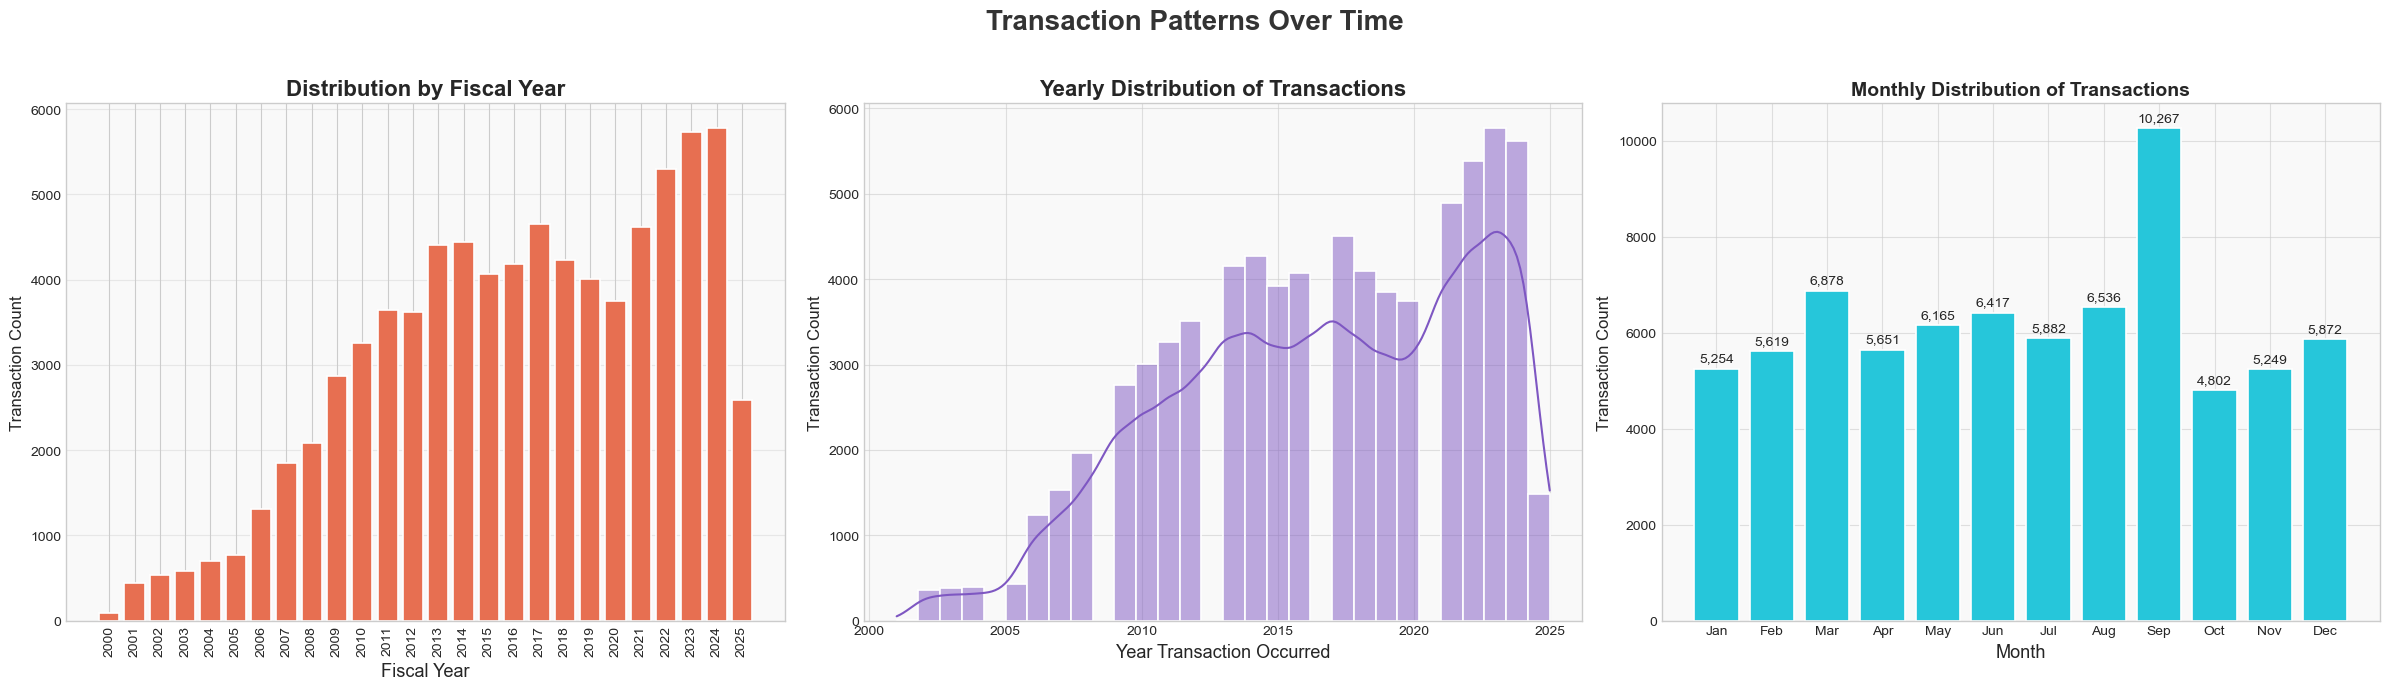

In [22]:
# Extract Year and Month
df_['Year'] = df_['transaction_date'].dt.year
df_['Month'] = df_['transaction_date'].dt.month

# Monthly counts
monthly_counts = df_['Month'].value_counts().sort_index()

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# Fiscal Year Distribution
fiscal_counts = df_['fiscal_year'].value_counts().sort_index()
bars1 = axes[0].bar(
    fiscal_counts.index.astype(str),
    fiscal_counts.values,
    color='#E76F51',
    edgecolor='white',
    linewidth=1.2
)
axes[0].set_title('Distribution by Fiscal Year', fontsize=16, weight='semibold')
axes[0].set_xlabel('Fiscal Year', fontsize=13)
axes[0].set_xticks(range(len(fiscal_counts.index)))
axes[0].set_xticklabels(fiscal_counts.index.astype(str), rotation=90)
axes[0].set_ylabel('Transaction Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.4)
axes[0].set_facecolor('#f9f9f9')

# Yearly Distribution
sns.histplot(
    data=df_,
    x='Year',
    bins=30,
    kde=True,
    color='#7E57C2',
    ax=axes[1],
    edgecolor='white',
    linewidth=1.2
)
axes[1].set_title('Yearly Distribution of Transactions', fontsize=16, weight='semibold')
axes[1].set_xlabel('Year Transaction Occurred', fontsize=13)
axes[1].set_ylabel('Transaction Count', fontsize=12)
axes[1].grid(alpha=0.6)
axes[1].set_facecolor('#f9f9f9')

# Monthly Distribution
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_counts.index = month_names[:len(monthly_counts)]

bars2 = axes[2].bar(
    monthly_counts.index,
    monthly_counts.values,
    color='#26C6DA',
    edgecolor='white',
    linewidth=1.2
)
axes[2].set_title('Monthly Distribution of Transactions', fontsize=14, weight='semibold')
axes[2].set_xlabel('Month', fontsize=13)
axes[2].set_ylabel('Transaction Count', fontsize=12)
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(alpha=0.6)
axes[2].set_facecolor('#f9f9f9')

# Annotate monthly bars
for bar in bars2:
    height = bar.get_height()
    axes[2].annotate(
        f'{int(height):,}',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center', va='bottom',
        fontsize=10
    )

# General aesthetics
plt.suptitle('Transaction Patterns Over Time', fontsize=20, weight='bold', color='#333333')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Missing count before: 4896


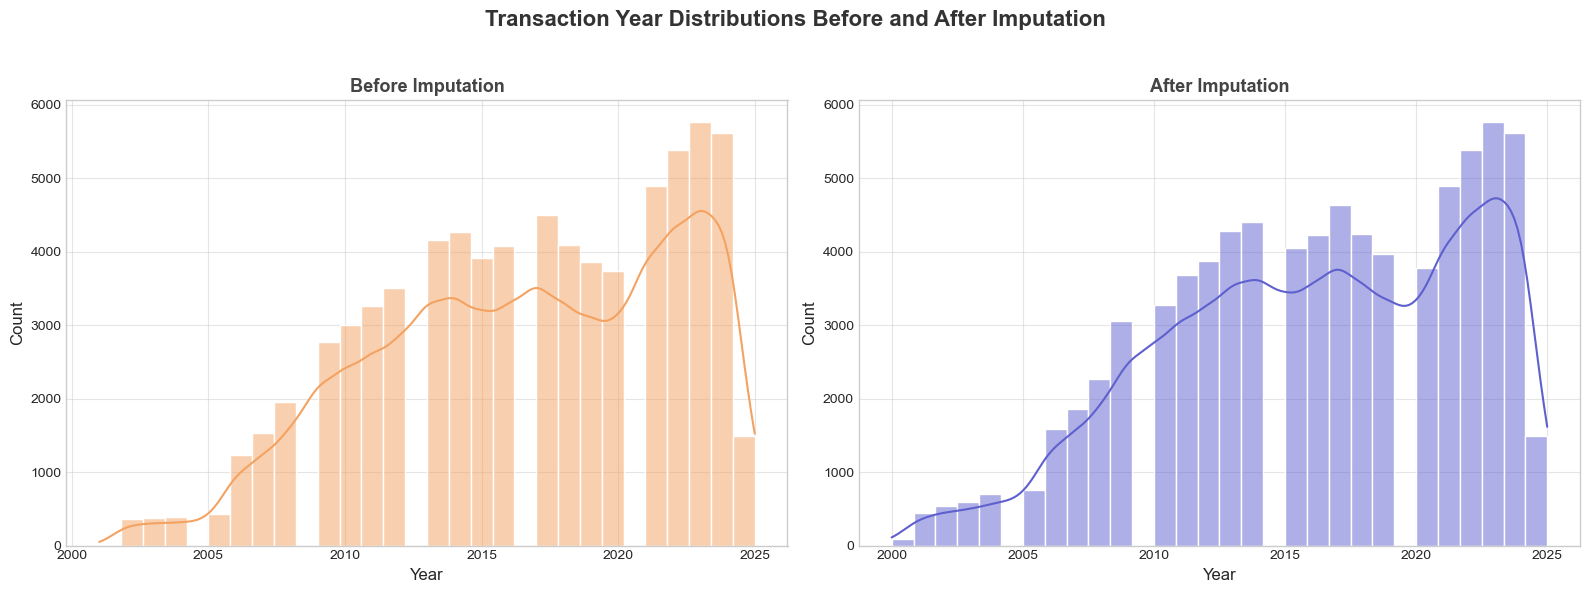

Missing count after: 0

Median transaction year before: 2017.0
Median transaction year after: 2017.0

Mean transaction year before: 2016.55
Mean transaction year after: 2016.05

IQR before: 9.0
IQR after: 9.0


In [23]:
# ------- [Impute transaction_date] -------

'''
    We will use the fiscal year and implement forward fill. 
    Should any missing values remain, we will use the median and
    further fall back to the end date of the fiscal year because 
    most transactions tend to occur towards the end of the fiscal year, 
    as seen from the distribution plots.
'''

# Before Imputation snapshot
before = data
print("Missing count before:", before['transaction_date'].isna().sum())
before_dates = before['transaction_date'].dropna()

# Impute
data['transaction_date'] = pd.to_datetime(data['transaction_date'], errors='coerce')

median_dates = (
    data.groupby('fiscal_year')['transaction_date']
        .median()
        .fillna(method='ffill')
)

def impute_transaction_date(row):
    if pd.notnull(row['transaction_date']):
        return row['transaction_date']
    fy = row['fiscal_year']
    if fy in median_dates.index and pd.notnull(median_dates[fy]):
        return median_dates[fy]
    else:
        return pd.Timestamp(year=int(fy), month=9, day=30)

data['transaction_date'] = data.apply(impute_transaction_date, axis=1)

# After Imputation
after_dates = data['transaction_date']

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before Imputation
sns.histplot(before_dates.dt.year, bins=30, kde=True, color='#F4A261', edgecolor='white', ax=axes[0]) 
axes[0].set_title("Before Imputation", fontsize=13, weight='semibold', color='#444')
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].grid(alpha=0.5)

# After Imputation
sns.histplot(after_dates.dt.year, bins=30, kde=True, color='#5E60CE', edgecolor='white', ax=axes[1])  
axes[1].set_title("After Imputation", fontsize=13, weight='semibold', color='#444')
axes[1].set_xlabel("Year", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].grid(alpha=0.5)

# Tighten it all up
plt.suptitle("Transaction Year Distributions Before and After Imputation", 
             fontsize=16, weight='semibold', color='#333')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Statistical Checks
print("Missing count after:", data['transaction_date'].isna().sum())

print("\nMedian transaction year before:", before_dates.dt.year.median())
print("Median transaction year after:", after_dates.dt.year.median())

print("\nMean transaction year before:", before_dates.dt.year.mean().round(2))
print("Mean transaction year after:", after_dates.dt.year.mean().round(2))

print("\nIQR before:", before_dates.dt.year.quantile(0.75) - before_dates.dt.year.quantile(0.25))
print("IQR after:", after_dates.dt.year.quantile(0.75) - after_dates.dt.year.quantile(0.25))

In [24]:
# Final data check
print(f"The data now has {data.shape[0]} entries and {data.shape[1]} features.")

# Checking for missing values
print("\nMissingness Distribution:\n", data.isna().sum())

The data now has 79488 entries and 14 features.

Missingness Distribution:
 country_name                          0
managing_agency_name                  0
managing_subagency_or_bureau_name     0
implementing_partner_category_name    0
implementing_partner_name             0
us_category_name                      0
us_sector_name                        0
funding_agency_name                   0
foreign_assistance_objective_name     0
transaction_type_name                 0
fiscal_year                           0
transaction_date                      0
current_dollar_amount                 0
constant_dollar_amount                0
dtype: int64


In [25]:
# Save this data to try time series on 
# data.to_csv('data_no_feature_engineering.csv', index=False)

## 3.2 FEATURE ENGINEERING

Data is clean but not granular as we would like for this analysis. As such, we will engineer some crucial columns that will help us arrive at our goal, and remove umbrella features like us_category_name.

In [26]:
print("Categories:\n", data['us_category_name'].value_counts())
print("\n"+'**'*35+'\n')
print("Sectors:\n", data["us_sector_name"].value_counts())

Categories:
 us_category_name
Health                                     29333
Program Support                            22051
Economic Development                        9506
Humanitarian Assistance                     6251
Democracy, Human Rights, and Governance     4104
Education and Social Services               2759
Peace and Security                          2635
Environment                                 2549
Multi-sector                                 300
Name: count, dtype: int64

**********************************************************************

Sectors:
 us_sector_name
Direct Administrative Costs                              21929
HIV/AIDS                                                 16614
Protection, Assistance and Solutions                      5890
Agriculture                                               4912
Family Planning and Reproductive Health                   2733
Macroeconomic Foundation for Growth                       2284
Maternal and Child Health  

#### *Observation:*

The category and sector distributions are closely related but operate at different granularity levels. Categories (like Health, Program Support, Economic Development) are broad umbrellas, while sectors (like HIV/AIDS, Maternal and Child Health, Agriculture) are specific program types nested within them.

As such, we will drop us_category_name and remain with the more detailed us_sector_name.

In [27]:
# Drop us_category_name
data.drop(columns=['us_category_name'],inplace=True)

Now we map these sectors into more succint umbrella terms for easier analysis.

In [28]:
# Standardise the string values
data['us_sector_name'] = data['us_sector_name'].str.strip().str.lower()

# Define mapping dictionary
mapping = {
    # Health
    'Health' : 
        ['other public health threats',
        'pandemic influenza and other emerging threats (pioet)',
        'malaria',
        'maternal and child health',
        'family planning and reproductive health',
        'hiv/aids',
        'social assistance',
        'water supply and sanitation',
        'tuberculosis',
        'nutrition',
        'health - general',
        'social services'],

    # Education
    'Education' : 
        ['basic education',
        'higher education',
        'education and social services - general'],

    # Security
    'Security' : 
        ['transnational crime',
        'stabilization operations and security sector reform',
        'peace and security - general',
        'counter-narcotics',
        'combating weapons of mass destruction (wmd)',
        'conflict mitigation and reconciliation',
        'counter-terrorism'],

    # Politics & Governance
    'Politics' : 
        ['good governance',
        'civil society',
        'democracy, human rights, and governance - general',
        'policies, regulations, and systems',
        'political competition and consensus-building'],

    # Human Rights
    'Human Rights' : 
        ['rule of law and human rights',
        'protection, assistance and solutions',
        'migration management'],

    # Environment
    'Environment' : 
    ['natural resources and biodiversity',
    'clean productive environment',
    'environment - general',
    'environment',
    'mining and natural resources'],
    
    # Agriculture
    'Agriculture': ['Agriculture'],

    # Economy
    'Economy':
        ['economic opportunity',
        'financial sector',
        'trade and investment',
        'macroeconomic foundation for growth',
        'labor policies and markets',
        'international contributions',
        'private sector competitiveness'],

    # Development & Humanitarian
    'Development' :
        ['infrastructure',
        'manufacturing',
        'economic development - general',
        'multi-sector - unspecified',
        'humanitarian assistance - general',
        'disaster readiness'],

    # Administration & Other
    'Administration' :
        ['monitoring and evaluation',
        'direct administrative costs']
}

# Categorizing every value with the category given in the map
def assign_category(text_entry):

    # Handle empty or non-string data
    if not isinstance(text_entry, str):
        return 'Other/Unspecified'

    text_lower = text_entry.lower()

    # Iterate through the main categories and their associated phrases
    for category, phrases in mapping.items():
        for phrase in phrases:
            # Check if any phrase is present in the text entry
            if phrase.lower() in text_lower:
                return category  # Return the high-level category and stop searching

    # If no match is found after checking all categories
    return 'Other/Unspecified'

data["us_sector_name"] = data["us_sector_name"].apply(assign_category)
print("Unique sector names after mapping:\n", data["us_sector_name"].unique())

Unique sector names after mapping:
 ['Education' 'Health' 'Administration' 'Politics' 'Human Rights'
 'Security' 'Economy' 'Agriculture' 'Environment' 'Development']


### 3.2.1 TEMPORAL FEATURES

From transaction date, we can extract the year, month and quater to track seasonal aid patterns. We also want to capture aid rush behavior before the fiscal year ends hence we will create a binary flag to check this in a variable called is_end_of_fiscal_year.

In [29]:
# Sort data for correct rolling
data = data.sort_values(by=['us_sector_name', 'fiscal_year'])

# Temporal Features
data['transaction_year'] = data['transaction_date'].dt.year
data['transaction_month'] = data['transaction_date'].dt.month
data['transaction_quarter'] = data['transaction_date'].dt.quarter

# End of fiscal year flag
data['is_end_of_fiscal_year'] = data['transaction_month'].isin([8, 9]).astype(int)

# Days since start of fiscal year
data['days_since_start_of_year'] = (
    pd.to_datetime(data['transaction_date']) - 
    pd.to_datetime(data['fiscal_year'].astype(str) + '-01-01')
).dt.days

# Holiday quarter flag
data['is_holiday_quarter'] = data['transaction_quarter'].isin([4]).astype(int)

# Aid volatility (year-over-year)
volatility = (
    data.groupby('fiscal_year')['constant_dollar_amount']
        .std().reset_index()
        .rename(columns={'constant_dollar_amount': 'aid_volatility'})
)
data = data.merge(volatility, on='fiscal_year', how='left')

# Rolling 3-year mean & std per sector
# Rolling mean
data['rolling_mean_3yr'] = (
    data.groupby('us_sector_name')['constant_dollar_amount']
        .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

# Rolling std 
data['rolling_std_3yr'] = (
    data.groupby('us_sector_name')['constant_dollar_amount']
        .transform(lambda x: x.rolling(window=3, min_periods=2).std())
)

# Fill initial NaNs with 0 to show no volatility yet
data['rolling_std_3yr'] = data['rolling_std_3yr'].fillna(0)

### 3.2.2 AGGREGATES

In [30]:
# Yearly Aggregates by Fiscal Year
fiscal_agg = (
    data.groupby('fiscal_year', as_index=False)
        .agg(
            total_aid_fiscal=('constant_dollar_amount', 'sum'),
            transaction_count_fiscal=('constant_dollar_amount', 'count'),
            mean_aid_per_transaction_fiscal=('constant_dollar_amount', 'mean'),
            aid_std_fiscal=('constant_dollar_amount', 'std')
        )
)

# Yearly Aggregates by Transaction Year
data['transaction_year'] = data['transaction_date'].dt.year

transaction_agg = (
    data.groupby('transaction_year', as_index=False)
        .agg(
            total_aid_transaction=('constant_dollar_amount', 'sum'),
            transaction_count_transaction=('constant_dollar_amount', 'count'),
            mean_aid_per_transaction_transaction=('constant_dollar_amount', 'mean'),
            aid_std_transaction=('constant_dollar_amount', 'std')
        )
)

# Sectoral Aggregates by Fiscal Year
sector_agg = (
    data.groupby(['fiscal_year', 'us_sector_name'], as_index=False)
        .agg(
            total_sector_aid=('constant_dollar_amount', 'sum'),
            avg_sector_aid=('constant_dollar_amount', 'mean'),
            sector_transaction_count=('constant_dollar_amount', 'count')
        )
)

# Agency Aggregates by Fiscal Year
agency_agg = (
    data.groupby(['fiscal_year', 'managing_agency_name'], as_index=False)
        .agg(
            total_agency_aid=('constant_dollar_amount', 'sum'),
            avg_agency_aid=('constant_dollar_amount', 'mean'),
            agency_transaction_count=('constant_dollar_amount', 'count')
        )
)

# Partner Aggregates by Fiscal Year
partner_agg = (
    data.groupby(['fiscal_year', 'implementing_partner_name'], as_index=False)
        .agg(
            total_partner_aid=('constant_dollar_amount', 'sum'),
            partner_transaction_count=('constant_dollar_amount', 'count')
        )
)

# Merge Aggregates Back
data = data.merge(fiscal_agg, on='fiscal_year', how='left')
data = data.merge(sector_agg, on=['fiscal_year', 'us_sector_name'], how='left')
data = data.merge(agency_agg, on=['fiscal_year', 'managing_agency_name'], how='left')
data = data.merge(partner_agg, on=['fiscal_year', 'implementing_partner_name'], how='left')

# Compute Ratios & Yearly Change
data['sector_to_total_ratio'] = data['total_sector_aid'] / data['total_aid_fiscal']
data['agency_to_total_ratio'] = data['total_agency_aid'] / data['total_aid_fiscal']

# Year-over-year change based on fiscal aggregates
fiscal_agg['yearly_aid_change'] = fiscal_agg['total_aid_fiscal'].pct_change()

### 3.2.3 TRANSACTION LEAD AND LAG

To get the time gap (in days) between consecutive transactions for a given partner, agency, or sector. Will be useful for modeling continuity or irregular funding patterns.

In [31]:
# Transaction lag
data = data.sort_values(by=['implementing_partner_name', 'transaction_date'])
data['transaction_lag'] = (
    data.groupby('implementing_partner_name')['transaction_date']
        .diff().dt.days
)

# Transaction lead
data['transaction_lead'] = (
    data.groupby('implementing_partner_name')['transaction_date']
        .diff(-1).abs().dt.days
)

# Impute missing lag and lead values
# Partner-specific medians
data['transaction_lag'] = data.groupby('implementing_partner_name')['transaction_lag'] \
                              .transform(lambda x: x.fillna(x.median()))
data['transaction_lead'] = data.groupby('implementing_partner_name')['transaction_lead'] \
                               .transform(lambda x: x.fillna(x.median()))

# Global median fallback
global_lag_median = data['transaction_lag'].median()
global_lead_median = data['transaction_lead'].median()

data['transaction_lag'] = data['transaction_lag'].fillna(global_lag_median)
data['transaction_lead'] = data['transaction_lead'].fillna(global_lead_median)

### 3.2.4 SECTOR, AGENCY AND PARTNER GROWTH RATES

We then compute year-over-year growth rates in aid disbursements for each:
- Sector (us_sector_name)
- Agency (managing_agency_name)
- Partner (implementing_partner_name)

We do this by:
1. Aggregates total aid per fiscal year within each group.  
2. Calculates the **percentage change** (pct_change) from the previous year.  
3. Merges these rates back into the main dataset as:
   - sector_growth_rate
   - agency_growth_rate
   - partner_growth_rate

These features capture how funding levels evolve over time across key entities.

In [32]:
# Function to compute and merge growth rates safely
def compute_growth(data, group_col, new_col):
    growth_df = (
        data.groupby([group_col, 'fiscal_year'], as_index=False)
            .agg(total_aid_group=('constant_dollar_amount', 'sum'))
    )

    # Compute year-over-year growth
    growth_df[new_col] = growth_df.groupby(group_col)['total_aid_group'].pct_change()

    # Drop helper
    growth_df.drop(columns=['total_aid_group'], inplace=True)

    # Merge back
    data = data.merge(growth_df, on=['fiscal_year', group_col], how='left', validate='m:1')
    return data

# Compute all growth rates
for group_col, new_col in [
    ('us_sector_name', 'sector_growth_rate'),
    ('managing_agency_name', 'agency_growth_rate'),
    ('implementing_partner_name', 'partner_growth_rate')
]:
    data = compute_growth(data, group_col, new_col)

# Replace infinities with NaN
for col in ['sector_growth_rate', 'agency_growth_rate', 'partner_growth_rate']:
    data[col] = data[col].replace([np.inf, -np.inf], np.nan)

# Fill missing with 0 (no measurable change)
data[['sector_growth_rate', 'agency_growth_rate', 'partner_growth_rate']] = \
    data[['sector_growth_rate', 'agency_growth_rate', 'partner_growth_rate']].fillna(0)

# Cap outliers to improve interpretability (Winsorization)
cap_limits = {
    'sector_growth_rate': (-1, 1),      # -100% to +100%
    'agency_growth_rate': (-2, 2),      # -200% to +200%
    'partner_growth_rate': (-3, 3)      # -300% to +300%
}

for col, (low, high) in cap_limits.items():
    data[col] = data[col].clip(lower=low, upper=high)

### 3.2.5 AID DIVERSITY AND CONCENTRATION ACROSS AGENCIES AND PARTNERS

We engineer fiscal-year level features to capture the distribution and competitiveness of aid contributions among agencies:

1. **Agency Count per Fiscal Year (agency_count_fiscal)**  
   Measures the number of unique agencies contributing aid each fiscal year.  
   -> A higher count indicates broader donor participation, suggesting greater institutional diversity and shared responsibility.

2. **Aid Concentration Index (aid_concentration_index)**  
   Computed using the Herfindahl–Hirschman Index (HHI) to quantify how concentrated or distributed aid is among agencies.  
   -> A higher HHI means aid is dominated by fewer agencies (more concentrated), while a lower HHI implies aid is more evenly distributed across multiple contributors.

These features help reveal whether foreign aid flows are diversifying or centralizing over time, a key insight for understanding funding dependencies and ecosystem stability.

In [33]:
# Number of agencies contributing per fiscal year
agency_count = (
    data.groupby('fiscal_year')['managing_agency_name']
        .nunique().reset_index().rename(columns={
            'managing_agency_name':'agency_count_fiscal'})
)
data = data.merge(agency_count, on='fiscal_year', how='left')

# Aid concentration index -> Herfindahl-Hirschman Index
hh_index = (
    data.groupby('fiscal_year')['constant_dollar_amount']
        .apply(lambda x: ((x / x.sum()) ** 2).sum())
        .reset_index().rename(columns={
            'constant_dollar_amount':'aid_concentration_index'})
)
data = data.merge(hh_index, on='fiscal_year', how='left')

### 3.2.6 DEPENDENCY AND CHANGE SENSITIVITY

Then we measure the proportion of total aid in each fiscal year that is contributed by the top three agencies.

- We aim to highlight dominance dynamics — whether a few large agencies control most of the funding or if aid is more evenly spread.
- A high top-3 share indicates potential centralization of aid influence, while a lower share suggests broader distribution and competitiveness across agencies.

Together with the aid concentration index, this metric strengthens the understanding of aid market structure and power concentration within each fiscal year.

In [34]:
top3_share = (
    data.groupby(['fiscal_year', 'managing_agency_name'])['constant_dollar_amount']
        .sum().groupby('fiscal_year')
        .apply(lambda x: x.nlargest(3).sum() / x.sum())
        .reset_index(name='top3_agency_share')  # <- directly name the new column
)

data = data.merge(top3_share, on='fiscal_year', how='left')

### 3.2.7 AID CONCENTRATION METRICS

Then we computed the number of unique implementing partners per fiscal year and the average aid managed per partner.  
- partner_count_fiscal: total distinct partners involved in implementing aid projects each fiscal year.  
- aid_per_partner: average volume of aid managed per partner, indicating how implementation responsibilities are distributed.

In [35]:
aid_partner_count = (
    data.groupby('fiscal_year', as_index=False)
        .implementing_partner_name.nunique()
        .rename(columns={'implementing_partner_name': 'partner_count_fiscal'})
)
data = data.merge(aid_partner_count, on='fiscal_year', how='left')

data['aid_per_partner'] = data['total_aid_fiscal'] / data['partner_count_fiscal']

### 3.2.8 DOMINANT SECTOR PER AGENCY BASED ON FUNDING SHARE

Then we identified the primary sector each managing agency focuses on, based on total funding allocation.  
- Agencies are ranked by the total constant dollar amount disbursed across sectors.  
- The top-ranked sector (highest funding share) is tagged as the agency’s *dominant sector*, providing insight into each agency’s main area of engagement in Kenya.

In [36]:
# Dominant sector per agency (based on funding share)
agency_sector = (
    data.groupby(['managing_agency_name', 'us_sector_name'], as_index=False)
        .constant_dollar_amount.sum()
)
agency_sector['rank'] = (
    agency_sector.groupby('managing_agency_name')['constant_dollar_amount']
        .rank(method='dense', ascending=False)
)
dominant_sector = agency_sector.loc[agency_sector['rank'] == 1, 
                                    ['managing_agency_name', 'us_sector_name']]
dominant_sector.rename(columns={'us_sector_name': 'dominant_sector_per_agency'}, inplace=True)
data = data.merge(dominant_sector, on='managing_agency_name', how='left')  

### 3.2.9 AID DIVERSITY INDEX

Next, we compute an **Aid Diversity Index** using Shannon entropy to measure how evenly aid is distributed across sectors each fiscal year.  
- A higher index value indicates that funding is more evenly spread across multiple sectors (greater diversity).  
- A lower value suggests aid is concentrated in fewer sectors, showing less diversification of support.

In [37]:
def shannon_entropy(x):
    p = x / x.sum()
    return -(p * np.log2(p)).sum()

entropy_df = (
    data.groupby(['fiscal_year', 'us_sector_name'], as_index=False)
        .constant_dollar_amount.sum()
)
entropy_df = (
    entropy_df.groupby('fiscal_year')['constant_dollar_amount']
        .apply(shannon_entropy)
        .reset_index()
        .rename(columns={'constant_dollar_amount': 'aid_diversity_index'})
)
data = data.merge(entropy_df, on='fiscal_year', how='left')

### 3.2.10 CROSS FEATURE INTERRACTIONS

Then we capture **relationships between key entities** by combining categorical identifiers:  
- agency_sector_interaction links each managing agency to its respective sector, helping model how agency–sector pairings influence aid flows.  
- partner_agency_interaction links implementing partners to managing agencies, capturing potential collaboration or funding patterns.

In [38]:
data['agency_sector_interaction'] = (
    data['managing_agency_name'].astype(str) + '_' + data['us_sector_name'].astype(str)
)
data['partner_agency_interaction'] = (
    data['implementing_partner_name'].astype(str) + '_' + data['managing_agency_name'].astype(str)
)

### 3.2.11 NORMALIZED AND RELATIVE RATIOS 

These features measure how each transaction compares to overall fiscal trends:  
- aid_per_transaction_ratio shows how large a transaction is relative to the **average aid per transaction** that fiscal year.  
- relative_aid_share represents the **proportion of total yearly aid** contributed by each transaction, indicating its relative financial weight.

In [39]:
data['aid_per_transaction_ratio'] = (
    data['constant_dollar_amount'] / data['mean_aid_per_transaction_fiscal']
)
data['relative_aid_share'] = (
    data['constant_dollar_amount'] / data['total_aid_fiscal']
)

### 3.2.12 TRANSACTION SIZE

We convert the current dollar amount into categorical data which will be simpler to use during modelling.

In [40]:
data['transaction_size'] = pd.qcut(
    data['current_dollar_amount'].rank(method='first'),
    q=3, labels=['Low', 'Medium', 'High']
)

### 3.2.13 COLUMN RENAMING

#### Foreign Assistance Objective

Some column names like foreign_assistance_objective_name are too long and will be tedious to write in code. As such, we will rename them into shorter, more intuitive names.

In [41]:
# Get unique values to understand what the column is about
print("Unique values in foreign_assistance_objective_name:", data['foreign_assistance_objective_name'].unique())

Unique values in foreign_assistance_objective_name: ['Economic' 'Military']


It talks about the objective of the funding agency. We rename it to 'objective'.

In [42]:
# Renaming the column
data = data.rename(columns={'foreign_assistance_objective_name': 'objective'})

#### Funding–Management Relationship

From the initial data uniqueness check, funding agency name and managing agency seem to have the same information. We will shed more light on this to see how similar they actually are.

In [43]:
print('Unique values in funding_agency_name:', data['funding_agency_name'].nunique())
print('Unique values in managing_agency_name:', data['managing_agency_name'].nunique())

# Check the unique values themselves
print("\n"+'--'*50+'\n')
print("Unique values in funding_agency_name:\n", data['funding_agency_name'].unique())
print("\n"+'--'*50+'\n')
print("Unique values in managing_agency_name:\n", data['managing_agency_name'].unique())

Unique values in funding_agency_name: 21
Unique values in managing_agency_name: 20

----------------------------------------------------------------------------------------------------

Unique values in funding_agency_name:
 ['African Development Foundation' 'Department of State'
 'Department of Agriculture' 'U.S. Agency for International Development'
 'Trade and Development Agency' 'Millennium Challenge Corporation'
 'Department of the Interior' 'Department of Health and Human Services'
 'Department of Energy' 'Department of Commerce'
 'Department of the Treasury' 'Department of Labor'
 'U.S. International Development Finance Corporation'
 'Environmental Protection Agency' 'Department of Defense'
 'Department of Homeland Security' 'Department of the Army'
 'Department of Justice' 'Department of Transportation'
 'Federal Trade Commission' 'Peace Corps']

----------------------------------------------------------------------------------------------------

Unique values in managing_agenc

Check correlation between what agency funds and which one manages a project.

In [44]:
cross_tab = pd.crosstab(data['funding_agency_name'], data['managing_agency_name'])
cross_tab.head()

managing_agency_name,African Development Foundation,Department of Agriculture,Department of Commerce,Department of Defense,Department of Energy,Department of Health and Human Services,Department of Homeland Security,Department of Justice,Department of Labor,Department of State,Department of Transportation,Department of the Interior,Department of the Treasury,Environmental Protection Agency,Federal Trade Commission,Millennium Challenge Corporation,Peace Corps,Trade and Development Agency,U.S. Agency for International Development,U.S. International Development Finance Corporation
funding_agency_name,,,,,,,,,,,,,,,,,,,,
African Development Foundation,1763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Department of Agriculture,0,549,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2570,0
Department of Commerce,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Department of Defense,0,0,0,235,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
Department of Energy,0,0,0,0,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


To capture the relationship between the source and executor of U.S. foreign aid, a composite feature funded_and_managed_by was created.  
This field concatenates each funding_agency_name with its corresponding managing_agency_name, providing a clear mapping of how financial resources flow from funders to implementing agencies.  
This feature will help analyze inter-agency dependencies and assess how funding cuts from specific sources may impact Kenya’s on-ground aid programs.

In [45]:
data['funded_and_managed_by']=(data['funding_agency_name'].astype(str).fillna('')+ \
                                  ' managed by ' + data['managing_agency_name'].astype(str).fillna('')
                                  )

# Drop original columns to avoid redundancy and multicollinearity
data.drop(columns=['funding_agency_name'], inplace=True)

#### Partner Combination

We begin by checking how related they are by checking how unique the columns are from each other

In [46]:
print('Unique values in implementing_partner_name:', data['implementing_partner_name'].nunique())
print('Unique values in implementing_partner_category_name:', data['implementing_partner_category_name'].nunique())

# Check the unique values themselves
print("\n"+'--'*50+'\n')
print("Unique values in implementing_partner_name:\n", data['implementing_partner_name'].unique())
print("\n"+'--'*50+'\n')
print("Unique values in implementing_partner_category_name:\n", data['implementing_partner_category_name'].unique())

Unique values in implementing_partner_name: 888
Unique values in implementing_partner_category_name: 8

----------------------------------------------------------------------------------------------------

Unique values in implementing_partner_name:
 ['4 Digits Consulting' '5 Stones intelligence Inc.'
 'A.P. Moller - Maersk Group' 'AAR Corp' 'ACF International' 'AGS Group'
 'AJGB International, Inc.' 'APA Insurance Group' 'ARD, Inc.' 'AT&T Inc.'
 'ATSG LLC' 'AVSI Foundation' 'Abt Associates, Inc.'
 'Academy for Educational Development' 'Ace Africa Kenya'
 'Achelis Kenya Limited' 'Achukule Agro-Forestry Tree Nursery'
 'Act Change Transform' 'Action for Enterprise, Inc.'
 'Adam Smith International' 'Adili Solar Hubs Ltd'
 'Advanced Information Network Systems, Inc.'
 'Adventist Development and Relief Agency International'
 'Africa Fruits & Veggie' 'Africa One Health University Network'
 'African Agricultural Technology Foundation' 'African American Institute'
 'African Conservation Centr

To simplify analysis and reduce redundancy, the columns implementing_partner_name and implementing_partner_category_name were merged into a single feature named partner_category_interaction.  
This captures both the implementing partner and their associated category in one variable, enabling more meaningful aggregations and comparisons during EDA.  

After verifying that all combinations were retained correctly, the original columns were dropped to maintain a clean and efficient dataset.

In [47]:
data['partner_category_interaction'] = (
    data['implementing_partner_name'].astype(str) + '_' +
    data['implementing_partner_category_name'].astype(str)
)

# Drop original columns to avoid redundancy and multicollinearity
data.drop(columns=[
    'implementing_partner_name', 'implementing_partner_category_name'
], inplace=True)

In [48]:
# Sanity check after feature engineering
print(f"Resultant dataset after feature engineering contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Duplicates
print("\nDuplicate records after feature engineering:", data.duplicated().sum())

# Remove duplicates if any
data.drop_duplicates(inplace=True)
print("Duplicate records after removal:", data.duplicated().sum())

# Missingness check
print("\nMissingness Distribution After Feature Engineering:\n", data.isna().sum())

# Final dataset shape
print(f"\nFinal dataset shape: {data.shape[0]} rows and {data.shape[1]} columns.")

Resultant dataset after feature engineering contains 79488 rows and 52 columns.

Duplicate records after feature engineering: 29
Duplicate records after removal: 0

Missingness Distribution After Feature Engineering:
 country_name                         0
managing_agency_name                 0
managing_subagency_or_bureau_name    0
us_sector_name                       0
objective                            0
transaction_type_name                0
fiscal_year                          0
transaction_date                     0
current_dollar_amount                0
constant_dollar_amount               0
transaction_year                     0
transaction_month                    0
transaction_quarter                  0
is_end_of_fiscal_year                0
days_since_start_of_year             0
is_holiday_quarter                   0
aid_volatility                       0
rolling_mean_3yr                     0
rolling_std_3yr                      0
total_aid_fiscal                     0
tr

In [49]:
data.drop(columns=['country_name', 'managing_subagency_or_bureau_name'],inplace=True)

We will save this new feature engineered data for analysis and modeling and compare it with the one that we did not do feature engineering and see how different they are.

In [50]:
# # Save dataset for analysis and modeling
# data.to_csv('clean_feature_engineered_data.csv', index=False)

## 3.3 EXPLORATORY DATA ANALYSIS (EDA)

Now we step into the fun part- analysis! We will do analysis on the clean data that has feature engineering done. We will work on a copy to avoid any unnecessary changes to the data.

In [51]:
# Load the data 
df_ = pd.read_csv("../Clean Data/clean_feature_engineered_data.csv")

# Create a copy and work on it
eda_df = df_.copy(deep=True)

### 3.3.1 TEMPORAL FEATURES

The fiscal year and transaction year represent distinct temporal dimensions in foreign assistance data. The fiscal year corresponds to the official financial reporting period, which begins on October 1 and ends on September 30 of the following year. In contrast, the transaction year reflects the actual calendar year in which funds were disbursed or received — essentially, when the money reached the recipient’s account.

This distinction helps identify timing gaps between financial planning and real-world execution, offering deeper insight into aid flow dynamics.

=== Fiscal Year Distribution ===
fiscal_year
2000      86
2001     439
2002     538
2003     583
2004     700
2005     766
2006    1310
2007    1852
2008    2081
2009    2869
2010    3260
2011    3640
2012    3619
2013    4403
2014    4444
2015    4064
2016    4186
2017    4652
2018    4228
2019    3980
2020    3747
2021    4619
2022    5298
2023    5736
2024    5776
2025    2583
Name: count, dtype: int64

=== Transaction Year Distribution ===
transaction_year
2000      86
2001     448
2002     544
2003     593
2004     704
2005     762
2006    1591
2007    1854
2008    2264
2009    3063
2010    3278
2011    3686
2012    3876
2013    4284
2014    4407
2015    4044
2016    4222
2017    4642
2018    4234
2019    3946
2020    3785
2021    4892
2022    5387
2023    5770
2024    5612
2025    1485
Name: count, dtype: int64


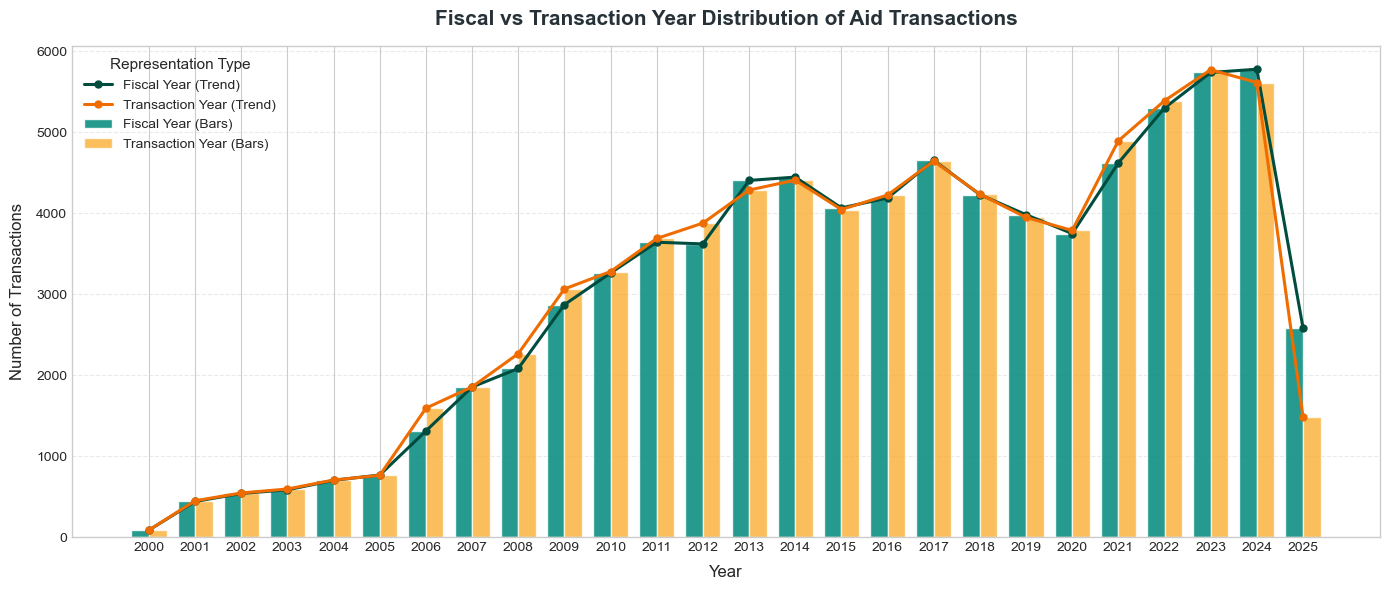

In [52]:
# Prepare counts
fy_counts = eda_df['fiscal_year'].value_counts().sort_index()
ty_counts = eda_df['transaction_year'].value_counts().sort_index()

# Display distributions before plotting
print("=== Fiscal Year Distribution ===")
print(fy_counts)
print("\n=== Transaction Year Distribution ===")
print(ty_counts)

# Align x-values
years = sorted(set(fy_counts.index).union(set(ty_counts.index)))
fy_values = fy_counts.reindex(years, fill_value=0)
ty_values = ty_counts.reindex(years, fill_value=0)

x = np.arange(len(years))
bar_width = 0.38

plt.figure(figsize=(14, 6), facecolor='white')

# Colors
fy_color = '#00897B'   
ty_color = '#F9A825'   
fy_line = '#004D40'    
ty_line = '#EF6C00'    

# Bars
bars_fy = plt.bar(
    x - bar_width/2, fy_values, width=bar_width,
    color=fy_color, alpha=0.85, label='Fiscal Year (Bars)',
    edgecolor='white', linewidth=1
)
bars_ty = plt.bar(
    x + bar_width/2, ty_values, width=bar_width,
    color=ty_color, alpha=0.75, label='Transaction Year (Bars)',
    edgecolor='white', linewidth=1
)

# Lines
line_fy, = plt.plot(
    x, fy_values, color=fy_line, linewidth=2.2, marker='o',
    markersize=5, label='Fiscal Year (Trend)'
)
line_ty, = plt.plot(
    x, ty_values, color=ty_line, linewidth=2.2, marker='o',
    markersize=5, label='Transaction Year (Trend)'
)

# Styling
plt.xticks(x, years, rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.title(
    'Fiscal vs Transaction Year Distribution of Aid Transactions',
    fontsize=15, fontweight='bold', color='#263238', pad=15
)
plt.xlabel('Year', fontsize=12, labelpad=8)
plt.ylabel('Number of Transactions', fontsize=12, labelpad=8)

# Grid and Legend
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(
    title='Representation Type', title_fontsize=11,
    fontsize=10, loc='upper left', frameon=False
)

plt.tight_layout()
plt.show()

##### *Observations:*

- The fiscal year and transaction year trends closely mirror each other.
- However, subtle differences emerge:
    - Transaction year counts are slightly higher than fiscal year counts in most periods - suggesting that fund disbursements often spill over beyond the fiscal reporting window.
    - The gap widens notably from 2006 onward, hinting at administrative or processing delays between planned (fiscal) and actual (transaction) aid delivery.
    - Both distributions dip in 2025, due to funding cuts.

### 3.3.2 AGGREGATES

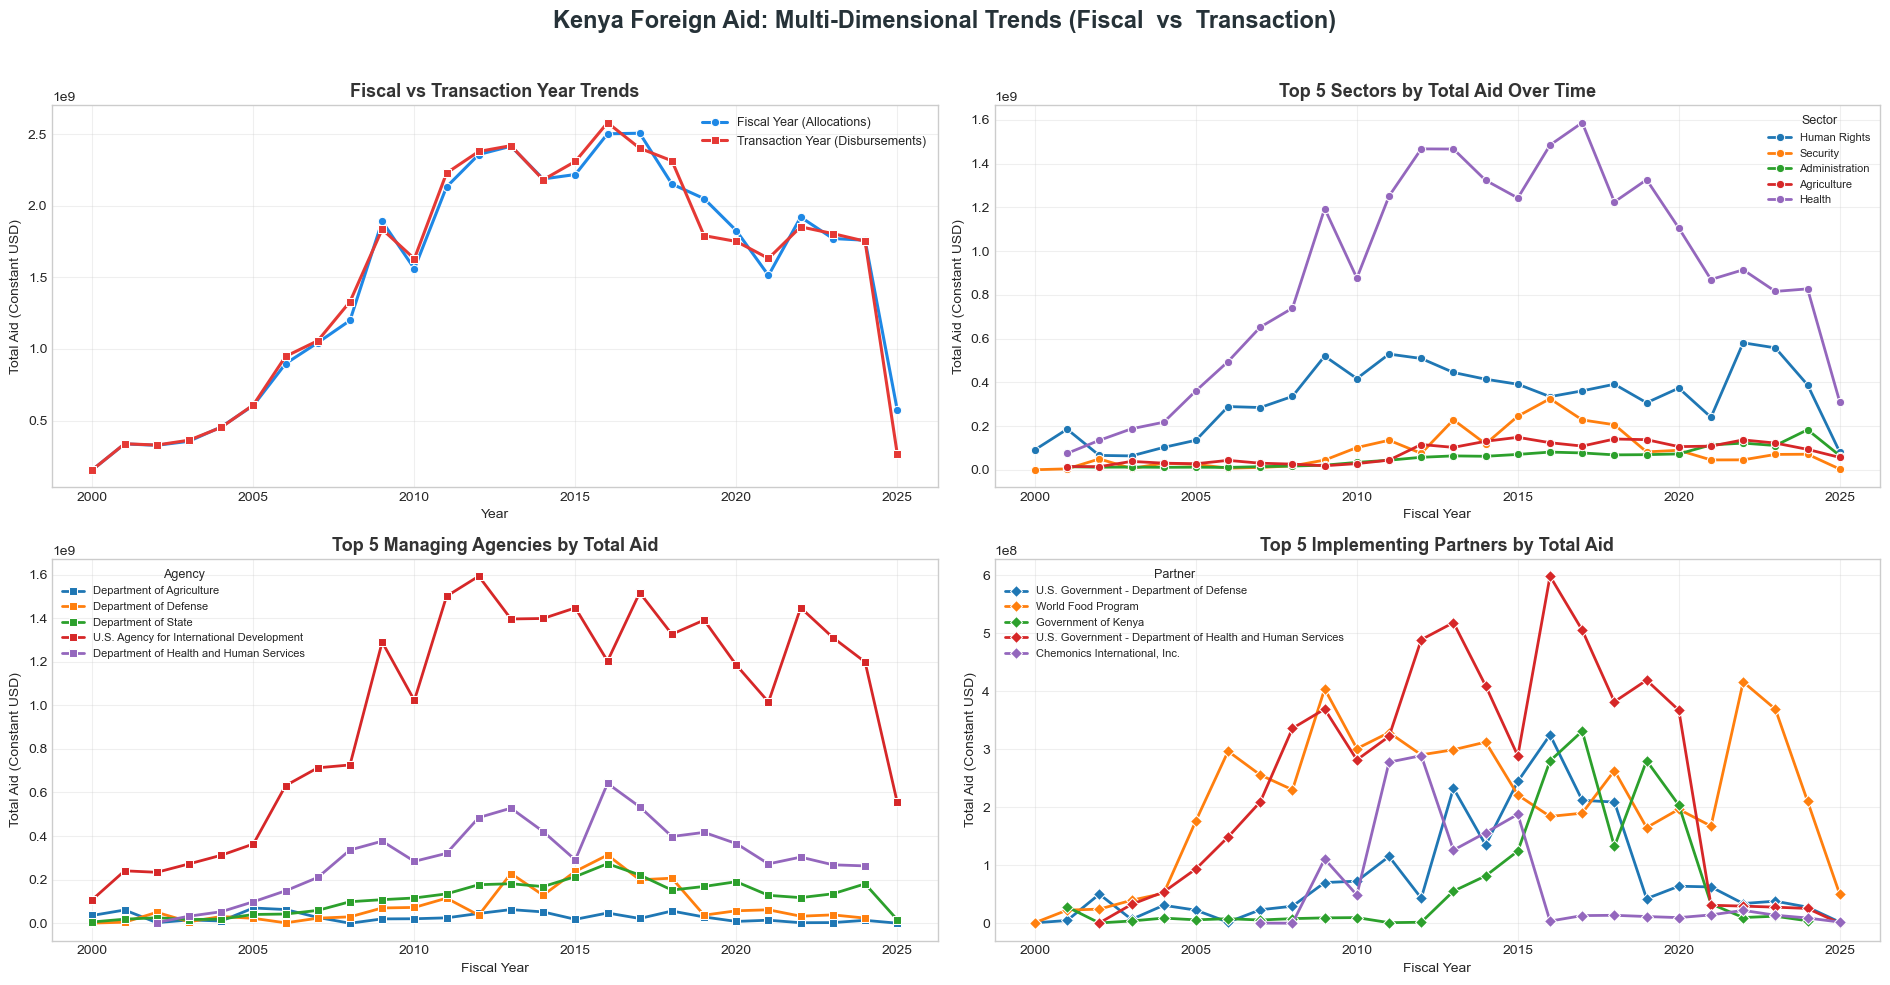

In [53]:
# Figure setup
fig, axes = plt.subplots(2, 2, figsize=(19, 10))
fig.suptitle("Kenya Foreign Aid: Multi-Dimensional Trends (Fiscal  vs  Transaction)", 
             fontsize=17, fontweight='bold', color='#263238', y=0.98)

# ==========================================================
# Fiscal vs Transaction Aid Trends
sns.lineplot(
    data=fiscal_agg, x='fiscal_year', y='total_aid_fiscal',
    label='Fiscal Year (Allocations)', color='#1E88E5', marker='o', linewidth=2.2, ax=axes[0, 0]
)
sns.lineplot(
    data=transaction_agg, x='transaction_year', y='total_aid_transaction',
    label='Transaction Year (Disbursements)', color='#E53935', marker='s', linewidth=2.2, ax=axes[0, 0]
)
axes[0, 0].set_title("Fiscal vs Transaction Year Trends", fontsize=13, fontweight='bold', color='#333')
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Total Aid (Constant USD)")
axes[0, 0].legend(frameon=False, fontsize=9)

# ==========================================================
# Sector-Level Trends
top_sectors = sector_agg.groupby('us_sector_name')['total_sector_aid'].sum().nlargest(5).index
sns.lineplot(
    data=sector_agg[sector_agg['us_sector_name'].isin(top_sectors)],
    x='fiscal_year', y='total_sector_aid', hue='us_sector_name',
    marker='o', linewidth=2, ax=axes[0, 1]
)
axes[0, 1].set_title("Top 5 Sectors by Total Aid Over Time", fontsize=13, fontweight='bold', color='#333')
axes[0, 1].set_xlabel("Fiscal Year")
axes[0, 1].set_ylabel("Total Aid (Constant USD)")
axes[0, 1].legend(title="Sector", frameon=False, fontsize=8, title_fontsize=9)

# ==========================================================
# Agency-Level Trends
top_agencies = agency_agg.groupby('managing_agency_name')['total_agency_aid'].sum().nlargest(5).index
sns.lineplot(
    data=agency_agg[agency_agg['managing_agency_name'].isin(top_agencies)],
    x='fiscal_year', y='total_agency_aid', hue='managing_agency_name',
    marker='s', linewidth=2, ax=axes[1, 0]
)
axes[1, 0].set_title("Top 5 Managing Agencies by Total Aid", fontsize=13, fontweight='bold', color='#333')
axes[1, 0].set_xlabel("Fiscal Year")
axes[1, 0].set_ylabel("Total Aid (Constant USD)")
axes[1, 0].legend(title="Agency", frameon=False, fontsize=8, title_fontsize=9)

# =========================================================
# Partner-Level Trends
top_partners = partner_agg.groupby('implementing_partner_name')['total_partner_aid'].sum().nlargest(5).index
sns.lineplot(
    data=partner_agg[partner_agg['implementing_partner_name'].isin(top_partners)],
    x='fiscal_year', y='total_partner_aid', hue='implementing_partner_name',
    marker='D', linewidth=2, ax=axes[1, 1]
)
axes[1, 1].set_title("Top 5 Implementing Partners by Total Aid", fontsize=13, fontweight='bold', color='#333')
axes[1, 1].set_xlabel("Fiscal Year")
axes[1, 1].set_ylabel("Total Aid (Constant USD)")
axes[1, 1].legend(title="Partner", frameon=False, fontsize=8, title_fontsize=9)

# Global styling
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=0)
    ax.grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##### *Observations:*

- Fiscal vs Transaction Year Alignment
    - The data shows a strong alignment between allocations (fiscal year) and actual disbursements (transaction year) — meaning that what’s budgeted largely gets delivered. Both trends peak between 2013 and 2015, followed by a gradual decline.

- Sector Priorities
    - Health remains the dominant recipient of aid across all years, confirming Kenya’s sustained health-sector focus from international donors. Human rights and security funding rise notably post-2010, reflecting growing governance and stability initiatives. In contrast, agriculture and administration receive comparatively smaller, steadier shares.

- Managing Agencies
    - USAID stands out as the primary managing agency, driving most disbursements into Kenya. The Department of Health and Human Services follows, indicating strong health-focused interventions. Other U.S. agencies like Defense and State maintain smaller but consistent roles.

- Implementing Partners
    - Implementation is led by international partners such as the World Food Program, Chemonics International, and U.S. government entities, with limited direct execution by the Government of Kenya. This suggests a continued reliance on external capacity for program delivery.

### 3.3.3 TRANSACTION LEAD AND LAG

In [54]:
# Descriptive summary
lag_lead_summary = eda_df[['transaction_lag', 'transaction_lead']].describe().T
lag_lead_summary['median'] = data[['transaction_lag', 'transaction_lead']].median()
print("=== Transaction Lag & Lead Summary (Days) ===")
lag_lead_summary

=== Transaction Lag & Lead Summary (Days) ===


,count,mean,std,min,25%,50%,75%,max,median
transaction_lag,79459.0,23.392076,122.592163,0.0,0.0,0.0,23.0,7517.0,0.0
transaction_lead,79459.0,23.392076,122.592163,0.0,0.0,0.0,23.0,7517.0,0.0


##### *Interpretation:*

- Frequent Same-Day Transactions: Over 50% of all transactions occur on the same date, indicating that many partners process or record multiple disbursements in batches.
- Highly Variable Transaction Timing
    - While the average gap between transactions is 23 days, the variation is large (±123 days).
    - Some partners show gaps extending up to 20 years, reflecting uneven engagement or long project cycles.
- Structured but Uneven Behavior: The identical patterns in transaction lags and leads suggest that disbursement rhythms are systematic rather than random — likely driven by planned funding schedules.

- Two Distinct Partner Groups
    - High-Frequency Actors: Regular, continuous transactions.
    - Low-Frequency / Episodic Actors: Long pauses between activities.

Aid disbursement across partners is clustered, cyclical, and uneven- dominated by frequent small bursts and a few long delays.

### 3.3.4 SECTOR, AGENCY AND PARTNER GROWTH RATES

In [55]:
growth_summary = eda_df[['sector_growth_rate', 'agency_growth_rate', 'partner_growth_rate']].describe().T
print("=== Growth Rate Summary ===")
growth_summary

=== Growth Rate Summary ===


,count,mean,std,min,25%,50%,75%,max
sector_growth_rate,79459.0,0.087079,0.341118,-1.0,-0.108041,0.047588,0.259288,1.0
agency_growth_rate,79459.0,0.065809,0.352820,-2.0,-0.125699,0.001637,0.162323,2.0
partner_growth_rate,79459.0,0.230957,0.927419,-3.0,-0.274301,0.004352,0.392210,3.0


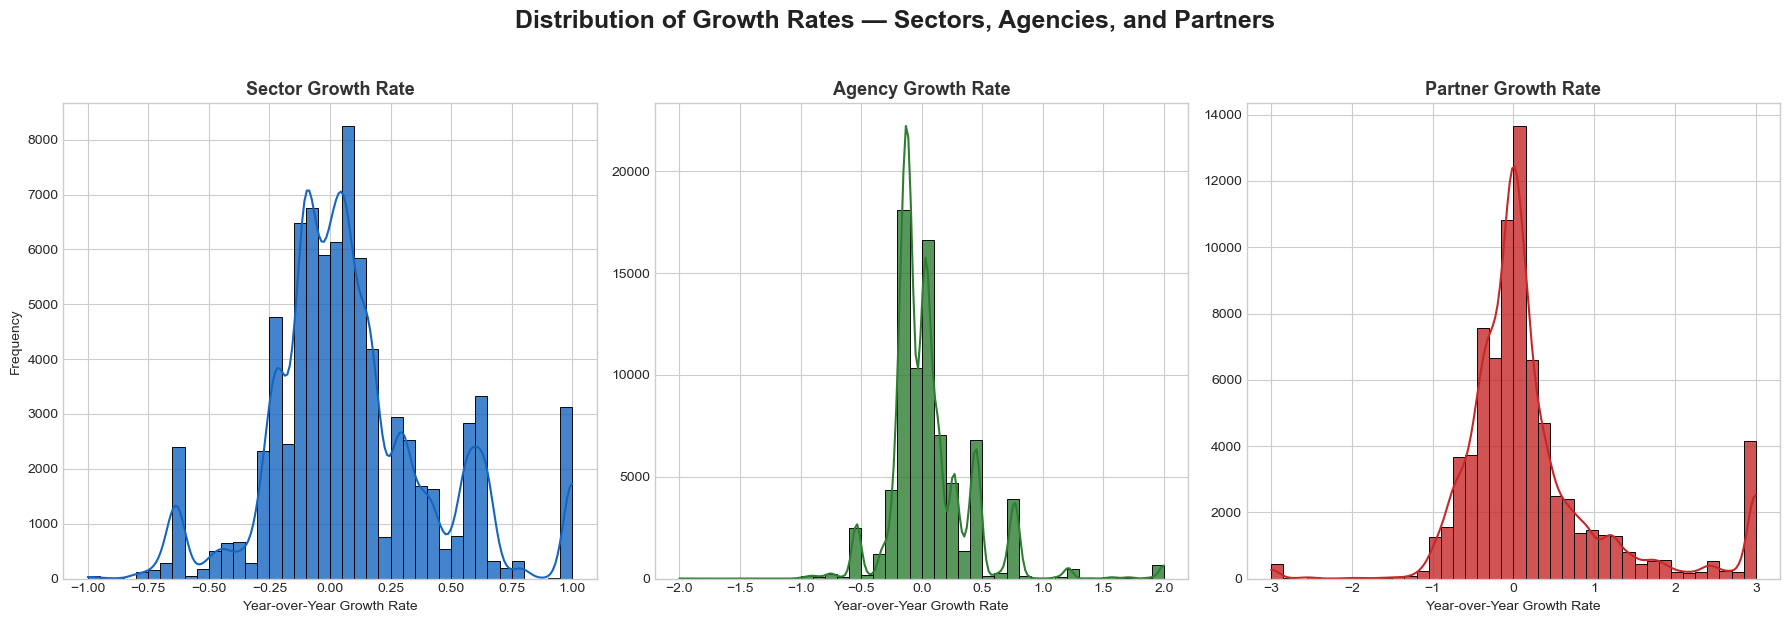

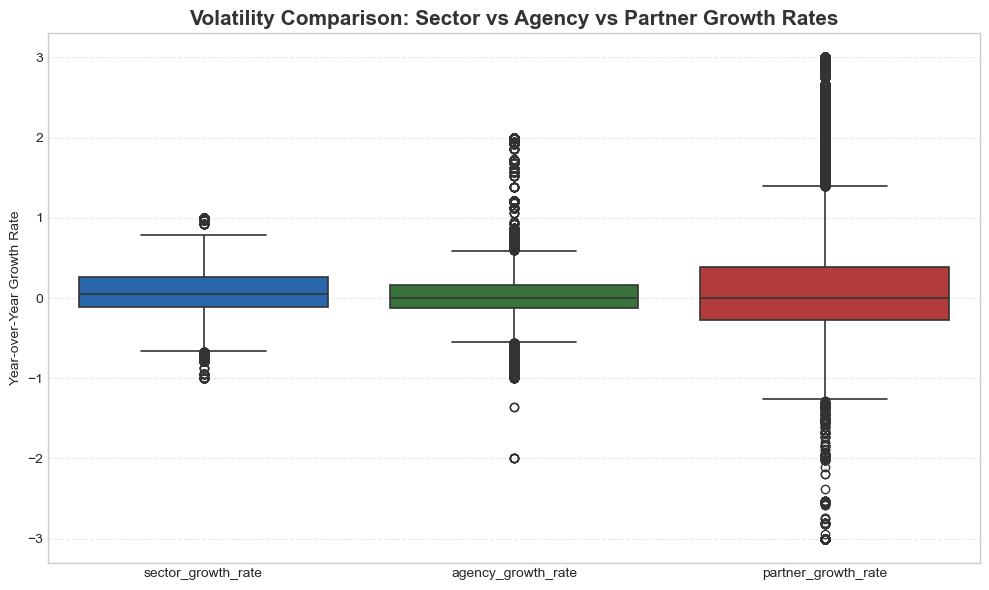

In [56]:
# Distributions
# ---------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = {
    'sector_growth_rate': '#1565C0',  
    'agency_growth_rate': '#2E7D32',   
    'partner_growth_rate': '#C62828'  
}

sns.histplot(eda_df['sector_growth_rate'], bins=40, color=colors['sector_growth_rate'],
             kde=True, ax=axes[0], alpha=0.8)
axes[0].set_title('Sector Growth Rate', fontsize=13, fontweight='bold', color='#333')
axes[0].set_xlabel('Year-over-Year Growth Rate')
axes[0].set_ylabel('Frequency')

sns.histplot(eda_df['agency_growth_rate'], bins=40, color=colors['agency_growth_rate'],
             kde=True, ax=axes[1], alpha=0.8)
axes[1].set_title('Agency Growth Rate', fontsize=13, fontweight='bold', color='#333')
axes[1].set_xlabel('Year-over-Year Growth Rate')
axes[1].set_ylabel('')

sns.histplot(eda_df['partner_growth_rate'], bins=40, color=colors['partner_growth_rate'],
             kde=True, ax=axes[2], alpha=0.8)
axes[2].set_title('Partner Growth Rate', fontsize=13, fontweight='bold', color='#333')
axes[2].set_xlabel('Year-over-Year Growth Rate')
axes[2].set_ylabel('')

plt.suptitle("Distribution of Growth Rates — Sectors, Agencies, and Partners",
             fontsize=18, fontweight='bold', color='#212121', y=1.03)
plt.tight_layout()
plt.show()


# Volatility Comparison
# ---------------------------------------------
plt.figure(figsize=(10, 6))
melted_growth = eda_df[[
    'sector_growth_rate', 'agency_growth_rate', 'partner_growth_rate']].melt(
    var_name='Category', value_name='Growth Rate'
)

sns.boxplot(
    data=melted_growth, x='Category', y='Growth Rate',
    palette=colors, showfliers=True, linewidth=1.2
)

plt.title("Volatility Comparison: Sector vs Agency vs Partner Growth Rates", 
          fontsize=15, fontweight='bold', color='#333')
plt.xlabel("")
plt.ylabel("Year-over-Year Growth Rate")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### *Observation:*

- Sectors: Average growth is ~9% with low volatility (std 0.34). This means funding across sectors is steady and predictable, showing policy consistency rather than short-term shifts.
- Agencies: Average growth is ~7% but slightly more volatile (std 0.35). Agencies adjust moderately to strategic realignments or project transitions, yet remain largely stable year to year.
Partners: Average growth is ~23%, with high volatility (std 0.93). This indicates rapid project cycles and frequent funding changes, common where donors test or rotate implementing partners.

### 3.3.5 AID DIVERSITY AND CONCENTRATION ACROSS AGENCIES

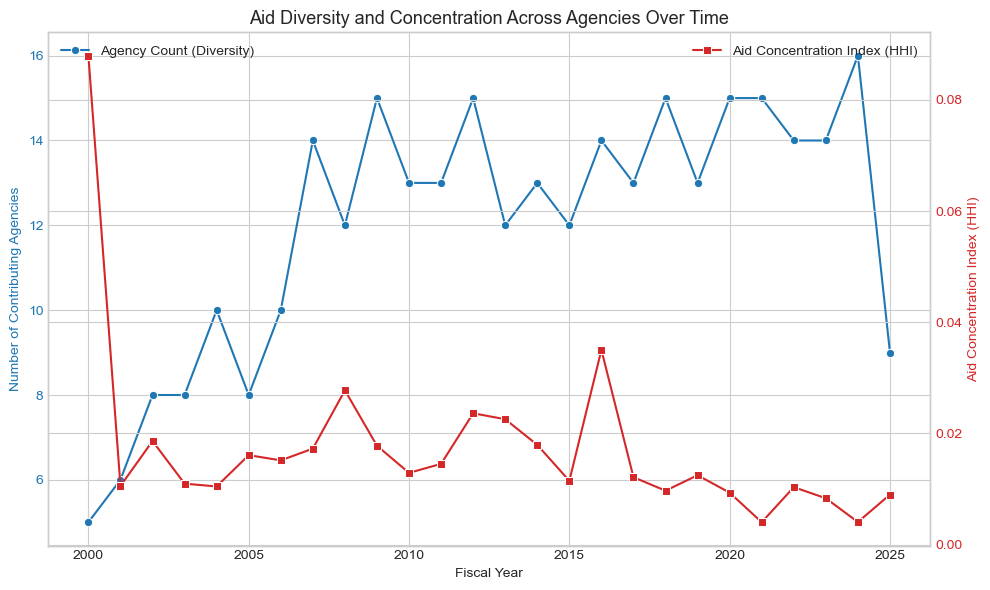

In [57]:
# Create figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line for agency count. This shows diversity
sns.lineplot(
    data=agency_count, 
    x='fiscal_year', y='agency_count_fiscal', 
    color='tab:blue', marker='o', ax=ax1, label='Agency Count (Diversity)'
)
ax1.set_ylabel('Number of Contributing Agencies', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary axis for concentration
ax2 = ax1.twinx()
sns.lineplot(
    data=hh_index, 
    x='fiscal_year', y='aid_concentration_index', 
    color='tab:red', marker='s', ax=ax2, label='Aid Concentration Index (HHI)'
)
ax2.set_ylabel('Aid Concentration Index (HHI)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Titles and layout
plt.title('Aid Diversity and Concentration Across Agencies Over Time', fontsize=13)
ax1.set_xlabel('Fiscal Year')
fig.tight_layout()
plt.show()

##### *Observations:*

- Agency diversity has gradually expanded. The number of contributing agencies rose from fewer than 10 in the early 2000s to around 14–16 in recent years. 
- Aid concentration (HHI) has steadily declined, remaining below 0.1 for most years. This means no single agency dominates the aid flow; contributions are increasingly spread across multiple actors, a sign of structural resilience.
- Periods of higher agency participation correspond to dips in concentration, which confirms the expected inverse relationship, as more agencies engage, dominance reduces.
- Recent fluctuations (post-2020) may suggest a mild consolidation, possibly reflecting restructuring or strategic alignment among agencies rather than withdrawal.

### 3.3.6 AID DIVERSITY AND CONCENTRATION ACROSS IMPLEMENTING PARTNERS

       partner_count_fiscal  aid_per_partner
count          79459.000000     7.945900e+04
mean             233.681383     8.345258e+06
std               69.164728     2.711146e+06
min                9.000000     3.264112e+06
25%              196.000000     5.103842e+06
50%              218.000000     8.947251e+06
75%              297.000000     1.026913e+07
max              351.000000     1.746701e+07


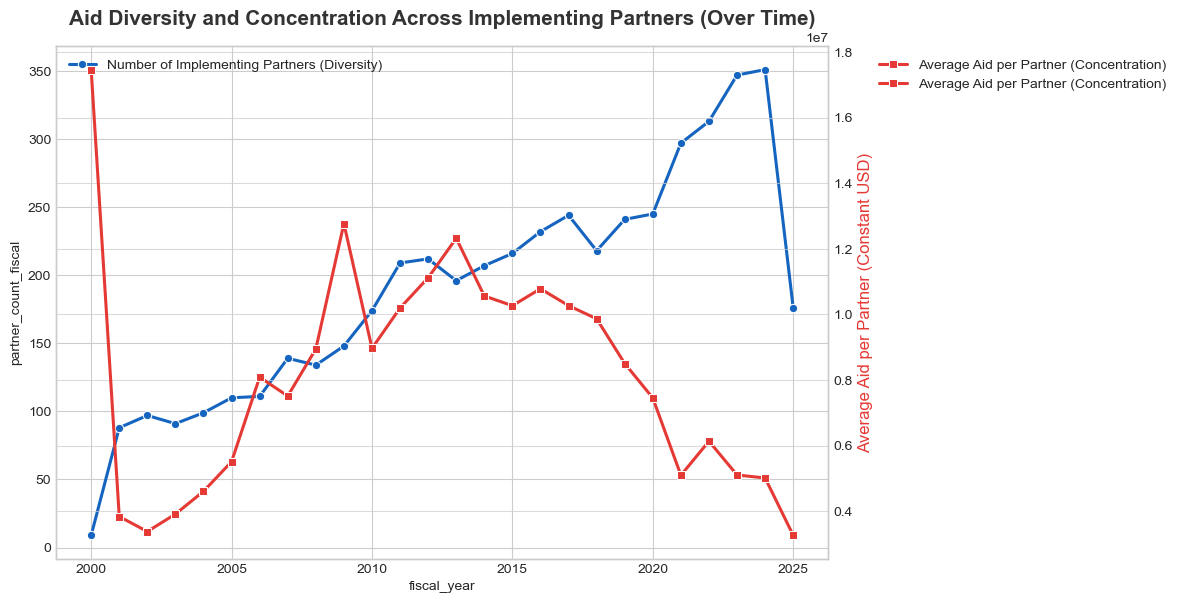

In [58]:
# Print the distribution
print(eda_df[['partner_count_fiscal', 'aid_per_partner']].describe())

# Create plot
plt.figure(figsize=(12,6))

# Number of partners
sns.lineplot(
    data=eda_df.drop_duplicates('fiscal_year'),
    x='fiscal_year', y='partner_count_fiscal',
    color='#1565C0', marker='o', linewidth=2.2,
    label='Number of Implementing Partners (Diversity)'
)

# Aid per partner
ax2 = plt.gca().twinx()
sns.lineplot(
    data=data.drop_duplicates('fiscal_year'),
    x='fiscal_year', y='aid_per_partner',
    color='#E53935', marker='s', linewidth=2.2,
    label='Average Aid per Partner (Concentration)',
    ax=ax2
)

plt.title('Aid Diversity and Concentration Across Implementing Partners (Over Time)',
          fontsize=15, weight='bold', color='#333')
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Number of Partners', fontsize=12, color='#1565C0')
ax2.set_ylabel('Average Aid per Partner (Constant USD)', fontsize=12, color='#E53935')

# Legend
lines1, labels1 = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

##### *Observations:*

- High Partner Engagement: On average, around 230 implementing partners contribute annually, a strong indicator of broad engagement and institutional collaboration in Kenya’s aid ecosystem.
- Uneven Distribution: Although partner diversity is high, the average aid per partner (≈ $8.3 million) varies widely, ranging from $3 million to nearly $17 million, revealing unequal aid distribution across partners.
- Moderate Concentration: The large spread (std ≈ $2.7 million) implies a moderate concentration of aid in a few major partners, while smaller ones receive significantly less, possibly reflecting differing project scales or mandates.

### 3.3.6 AID CONCENTRATION METRICS ACROSS PARTNERS AND AGENCIES

In [59]:
top_partners = (
    eda_df.groupby('partner_agency_interaction')['constant_dollar_amount']
        .sum()
        .nlargest(10)
        .reset_index()
)

top_partners

,partner_agency_interaction,constant_dollar_amount
0,U.S. Government - Department of Health and Human Services_Department of Health and Human Services,5.889865e+09
1,World Food Program_U.S. Agency for International Development,5.050755e+09
2,U.S. Government - Department of Defense_Department of Defense,2.028936e+09
3,Government of Kenya_U.S. Agency for International Development,1.529704e+09
4,"Chemonics International, Inc._U.S. Agency for International Development",1.308913e+09
5,FHI 360_U.S. Agency for International Development,1.064154e+09
6,U.S. Government - U.S. Agency for International Development_U.S. Agency for International Development,1.035356e+09
7,PATH_U.S. Agency for International Development,9.272436e+08
8,Enterprise - United States Redacted_U.S. Agency for International Development,8.375425e+08
9,United Nations Office of the United Nations High Commissioner for Refugees_Department of State,6.620679e+08


In [60]:
top3_per_year = (
    eda_df.groupby(['fiscal_year', 'partner_agency_interaction'])['constant_dollar_amount']
        .sum()
        .groupby('fiscal_year', group_keys=False)
        .apply(lambda x: x.nlargest(3))
        .reset_index()
)

top3_per_year

,fiscal_year,partner_agency_interaction,constant_dollar_amount
0,2000,U.S. Government - U.S. Agency for International Development_U.S. Agency for International Development,108824873.0
1,2000,U.S. Government - Department of Agriculture_Department of Agriculture,35869426.0
2,2000,U.S. Government - Peace Corps_Peace Corps,5954716.0
3,2001,International Emergency_U.S. Agency for International Development,65061326.0
4,2001,U.S. Government - Department of Agriculture_Department of Agriculture,60754395.0
...,...,...,...
73,2024,Enterprise - United States Redacted_U.S. Agency for International Development,146826856.0
74,2024,University System of Maryland_Department of Health and Human Services,88511680.0
75,2025,Enterprise - United States Redacted_U.S. Agency for International Development,68335202.0
76,2025,U.S. Government - U.S. Agency for International Development_U.S. Agency for International Development,60236436.0


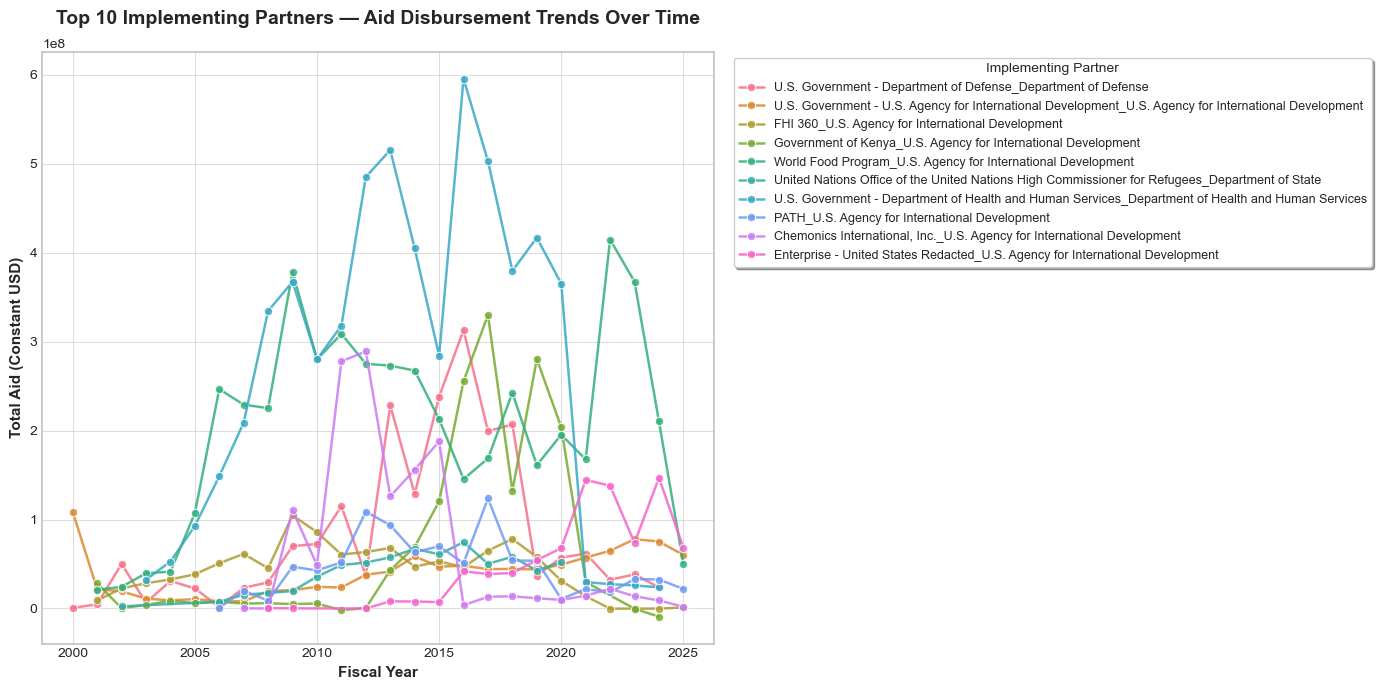

In [61]:
top_names = top_partners['partner_agency_interaction']
partner_trend = (
    eda_df[eda_df['partner_agency_interaction'].isin(top_names)]
        .groupby(['fiscal_year', 'partner_agency_interaction'])['constant_dollar_amount']
        .sum()
        .reset_index()
)

# Create figure with better styling
plt.figure(figsize=(14, 7))

# Use a more sophisticated color palette
colors = sns.color_palette("husl", n_colors=len(top_names))

# Create the line plot with enhanced styling
ax = sns.lineplot(
    data=partner_trend, 
    x='fiscal_year', 
    y='constant_dollar_amount',
    hue='partner_agency_interaction', 
    marker='o',
    linewidth=1.8,
    markersize=6,
    palette=colors,
    alpha=0.85
)

# Enhance title and labels
plt.title('Top 10 Implementing Partners — Aid Disbursement Trends Over Time',
          fontsize=14, weight='semibold', pad=20)
plt.xlabel('Fiscal Year', fontsize=11, weight='semibold')
plt.ylabel('Total Aid (Constant USD)', fontsize=11, weight='semibold')

# Improve legend
plt.legend(title='Implementing Partner', 
           frameon=True, 
           bbox_to_anchor=(1.02, 1), 
           loc='upper left',
           fontsize=9,
           title_fontsize=10,
           shadow=True,
           fancybox=True)

# Enhanced grid
plt.grid(alpha=0.7, linewidth=0.7)

# Improve spine visibility
for spine in ax.spines.values():
    spine.set_edgecolor('#bdc3c7')
    spine.set_linewidth(1.2)

plt.tight_layout()
plt.show()

##### *Observations:*

- Dominant Players:
    - A few partners, notably the United Nations Office of the High Commissioner for Refugees and the Government of Kenya (via USAID), consistently command a large share of total aid. Their peaks between 2010 and 2020 show their pivotal role in major aid programs.
- Volatility and Shifts:
    - Aid disbursements show sharp year-to-year fluctuations, especially among high-volume partners — a sign of project-based funding cycles rather than steady multi-year flows.
- Emerging Stability:
    - After 2020, there’s a slight stabilization or plateau in funding levels across several partners, possibly reflecting more structured aid programming or gradual phase-out of earlier emergency projects.
- Dependence Risks:
    - The top two or three partners dominate overall volumes — meaning Kenya’s aid landscape remains highly concentrated, with dependency risk if those key partners reduce funding.

### 3.3.7 DEPENDENCY AND CHANGE SENSITIVITY

=== Kenya's Top 5 highly dependent agencies === 

                        managing_agency_name  constant_dollar_amount
0  U.S. Agency for International Development            2.539919e+10
1    Department of Health and Human Services            7.051610e+09
2                        Department of State            3.008268e+09
3                      Department of Defense            2.028936e+09
4                  Department of Agriculture            7.216698e+08


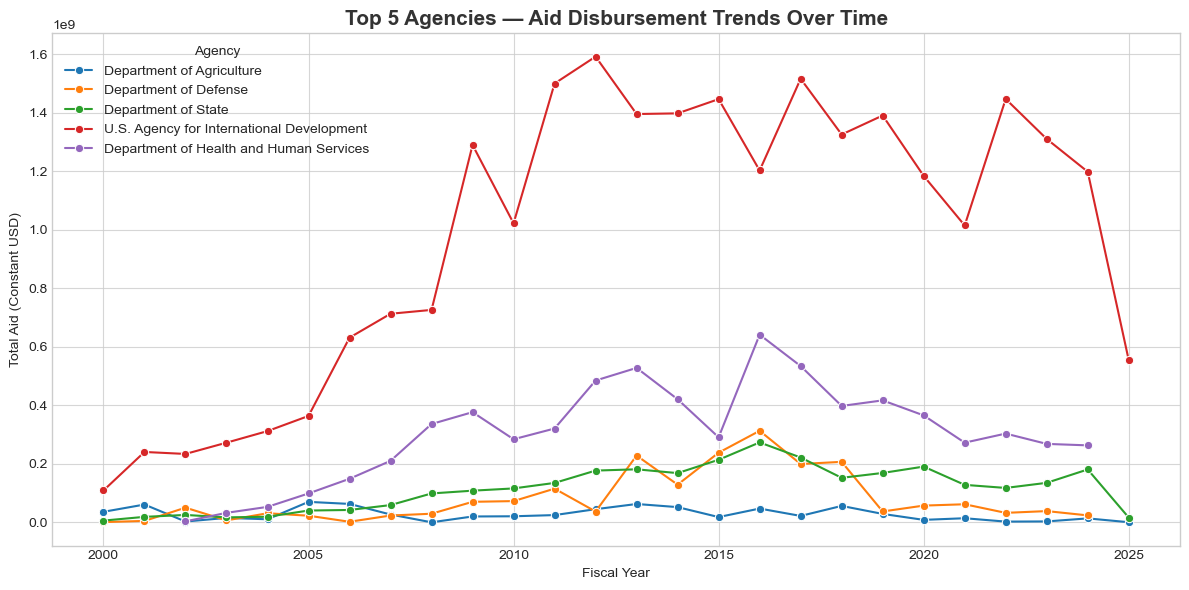

In [62]:
# Get the top 5 agencies Kenya is highly dependant on
overall_top5 = (
    eda_df.groupby('managing_agency_name')['constant_dollar_amount']
        .sum()
        .nlargest(5)
        .reset_index()
)

print("=== Kenya's Top 5 highly dependent agencies ===", '\n')
print(overall_top5)

top5_names = overall_top5['managing_agency_name']
subset = data[data['managing_agency_name'].isin(top5_names)]

# Visualize
plt.figure(figsize=(12,6))
sns.lineplot(
    data=subset.groupby(['fiscal_year','managing_agency_name'])['constant_dollar_amount'].sum().reset_index(),
    x='fiscal_year', y='constant_dollar_amount',
    hue='managing_agency_name', marker='o'
)
plt.title('Top 5 Agencies — Aid Disbursement Trends Over Time',
          fontsize=15, weight='bold', color='#333')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Aid (Constant USD)')
plt.legend(title='Agency', frameon=False)
plt.grid(alpha=0.8)
plt.tight_layout()
plt.show()

##### *Observations:*

The U.S. Agency for International Development (USAID) is the dominant contributor, providing over $25 billion, which is more than three times the aid given by the next largest contributor. Following USAID, the Department of Health and Human Services contributes around $7 billion, while the Departments of State, Defense, and Agriculture provide comparatively smaller amounts ranging from $0.7 to $3 billion.

### 3.3.8 WHAT SECTORS ARE DOMINATED BY WHAT AGENCIES

In [63]:
# Extract unique agency–dominant sector pairs
agency_dominance = (
    eda_df[['managing_agency_name', 'dominant_sector_per_agency']]
    .drop_duplicates()
    .sort_values(by='managing_agency_name')
    .reset_index(drop=True)
)

# Display neatly
agency_dominance 

,managing_agency_name,dominant_sector_per_agency
0,African Development Foundation,Development
1,Department of Agriculture,Health
2,Department of Commerce,Environment
3,Department of Defense,Security
4,Department of Energy,Security
5,Department of Health and Human Services,Health
6,Department of Homeland Security,Security
7,Department of Justice,Security
8,Department of Labor,Economy
9,Department of State,Human Rights


  dominant_sector_per_agency  num_agencies_dominating
0                Development                        4
1                    Economy                        4
3                     Health                        4
5                   Security                        4
2                Environment                        3
4               Human Rights                        1


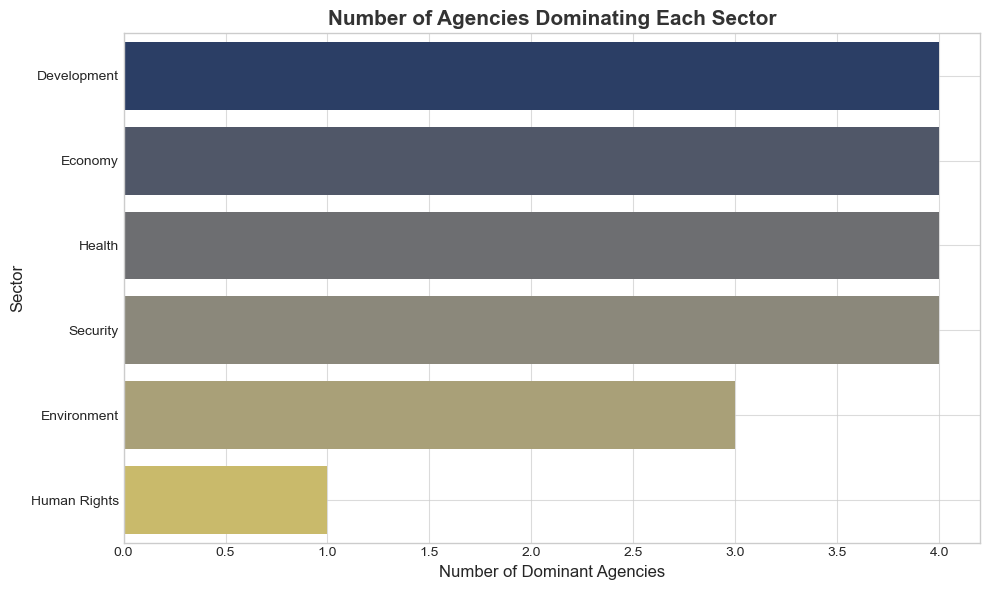

In [64]:
# Count how many unique agencies dominate in each sector
sector_agency_count = (
    dominant_sector.groupby('dominant_sector_per_agency')['managing_agency_name']
    .nunique()
    .reset_index(name='num_agencies_dominating')
    .sort_values('num_agencies_dominating', ascending=False)
)

print(sector_agency_count)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=sector_agency_count,
    x='num_agencies_dominating',
    y='dominant_sector_per_agency',
    palette='cividis'
)

# Styling
plt.title('Number of Agencies Dominating Each Sector', fontsize=15, weight='bold', color='#333')
plt.xlabel('Number of Dominant Agencies', fontsize=12)
plt.ylabel('Sector', fontsize=12)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

##### *Observations:*

- Development, Economy, Health, and Security, each serve as the dominant focus. 
- Meanwhile, Environmental initiatives are led by three agencies. 
- Human Rights, dominated by a single agency (the Department of State).

### 3.3.9 AID DIVERSITY INDEX ACROSS SECTORS OVER TIME

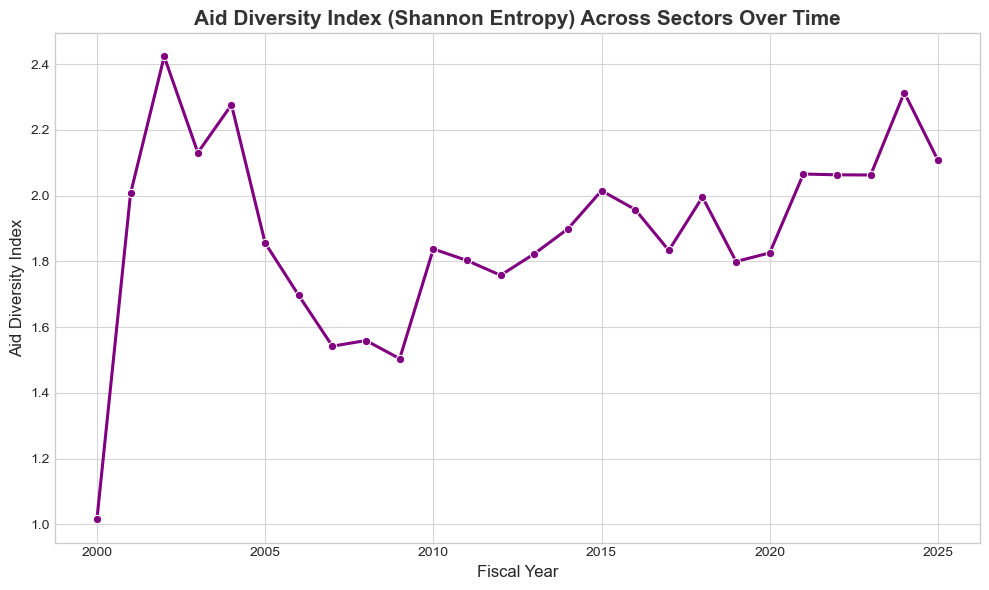

In [65]:
# Create plot
plt.figure(figsize=(10,6))
sns.lineplot(
    data=entropy_df,
    x='fiscal_year', y='aid_diversity_index',
    color='purple', marker='o', linewidth=2.2
)

plt.title('Aid Diversity Index (Shannon Entropy) Across Sectors Over Time',
          fontsize=15, weight='bold', color='#333')
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Aid Diversity Index', fontsize=12)
plt.grid(alpha=0.8)
plt.tight_layout()
plt.show()

##### *Observation:*

- Early 2000s (2000–2004):
    - A sharp rise in diversity. Aid became increasingly spread across many sectors. This could mark a period of broad-based development focus, possibly post-economic reforms or new donor programs targeting multiple fronts.
- Mid to Late 2000s (2005–2009):
    - A decline in diversity. Aid concentrated in fewer sectors. This may indicate a strategic pivot toward priority areas like health or governance reforms, meaning resources became more focused rather than evenly distributed.
- 2010–2015:
    - Gradual stabilization and moderate recovery. Aid starts diversifying again, reflecting renewed multi-sector engagement 
- 2016–2025:
    - A steady and slightly upward trend with small fluctuations. Aid diversity has improved and stabilized, suggesting a mature phase where multiple sectors consistently receive attention, with no single one overwhelmingly dominating.

### 3.3.10 TOTAL AID PER SECTOR

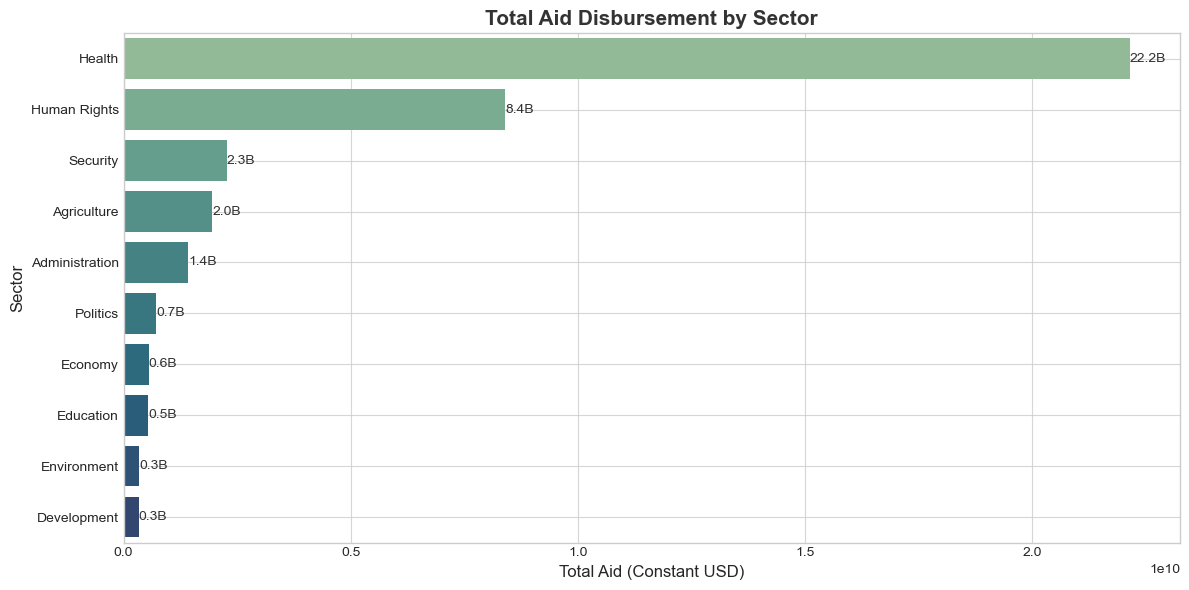

In [66]:
# Summarize total aid per sector
sector_aid = (
    data.groupby('us_sector_name', as_index=False)['constant_dollar_amount']
        .sum()
        .sort_values('constant_dollar_amount', ascending=False)
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=sector_aid,
    x='constant_dollar_amount', y='us_sector_name',
    palette='crest'
)

# Styling
plt.title('Total Aid Disbursement by Sector', fontsize=15, weight='bold', color='#333')
plt.xlabel('Total Aid (Constant USD)', fontsize=12)
plt.ylabel('Sector', fontsize=12)
plt.grid(alpha=0.8)

# Annotate bars
for i, v in enumerate(sector_aid['constant_dollar_amount']):
    plt.text(v, i, f'{v/1e9:.1f}B', va='center', fontsize=10, color='#333', ha='left')

plt.tight_layout()
plt.show()

##### *Observation:*

Aid is overwhelmingly concentrated in the health sector, which alone receives $22.2B - about 60% of all aid - more than all other sectors combined. Health and Human Rights together make up roughly 80% of total funding, leaving the remaining eight sectors to share just 20%. Traditional development areas like Agriculture ($2.0B), Education ($0.5B), and the Economy ($0.6B) are significantly underfunded, indicating a portfolio focused on immediate humanitarian and crisis response rather than long-term growth. Environment and Development receive the least funding at $0.3B each, reflecting minimal investment in sustainability or systemic change. Overall, aid prioritizes urgent health needs over a diversified, long-term development strategy.

# 4 MODELING